# Project Name - Bike Renting

In [114]:
# he objective of this Case is Predication of bike rental count on daily based on the environmental and seasonal settings


In [115]:
# import required libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import datetime
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics 



In [116]:
# set the working directory
os.chdir('E:\data_science')
os.getcwd() 

'E:\\data_science'

In [117]:
#The details of data attributes in the dataset are as follows:

#instant: Record index
#dteday: Date
#season: Season (1:springer, 2:summer, 3:fall, 4:winter)
#yr: Year (0: 2011, 1:2012)
#mnth: Month (1 to 12)
#holiday: weather day is holiday or not (extracted fromHoliday Schedule)
#weekday: Day of the week
#workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
#weathersit: (extracted fromFreemeteo)
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scatteredclouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#temp: Normalized temperature in Celsius. The values are derived via(t-t_min)/(t_max-t_min),t_min=-8, t_max=+39 (only in hourly scale)
#atemp: Normalized feeling temperature in Celsius. The values are derived via(t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
#hum: Normalized humidity. The values are divided to 100 (max)
#windspeed: Normalized wind speed. The values are divided to 67 (max)
#casual: count of casual users
#registered: count of registered users
#cnt: count of total rental bikes including both casual and registered

In [118]:
# Importing data
df = pd.read_csv('day.csv',index_col='dteday',parse_dates=True,infer_datetime_format=True,dayfirst=True)


In [119]:
df.shape

(731, 15)

In [120]:

# Dropping the 1st column i.e. 'instant' Coz it is seems statisticaly insignificant
df=df.drop('instant',axis=1)
df.head(5)

season  yr  mnth  holiday  weekday  workingday  weathersit  \
dteday                                                                   
2011-01-01       1   0     1        0        6           0           2   
2011-01-02       1   0     1        0        0           0           2   
2011-01-03       1   0     1        0        1           1           1   
2011-01-04       1   0     1        0        2           1           1   
2011-01-05       1   0     1        0        3           1           1   

                temp     atemp       hum  windspeed  casual  registered   cnt  
dteday                                                                         
2011-01-01  0.344167  0.363625  0.805833   0.160446     331         654   985  
2011-01-02  0.363478  0.353739  0.696087   0.248539     131         670   801  
2011-01-03  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
2011-01-04  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
2011-01-05  0.226957  0.229270  0.436957   0.186900      82        1518  1600

In [121]:
df.describe(),df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 14 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(10)
memory usage: 85.7 KB


(           season          yr        mnth     holiday     weekday  workingday  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
 std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
 min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
 25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
 50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
 75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
 max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   
 
        weathersit        temp       atemp         hum   windspeed  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean     1.395349    0.495385    0.474354    0.627894    0.190486   
 std      0.544894    0.183051    0.162961    0.14

In [122]:
# We have used dteday as index and converted it into DatetimeIndex
type(df.index)

pandas.tseries.index.DatetimeIndex

# Graphical EDA - Data Visualization

In [123]:
# setting up the sns for plots
sns.set(style='darkgrid',palette='Set1') 

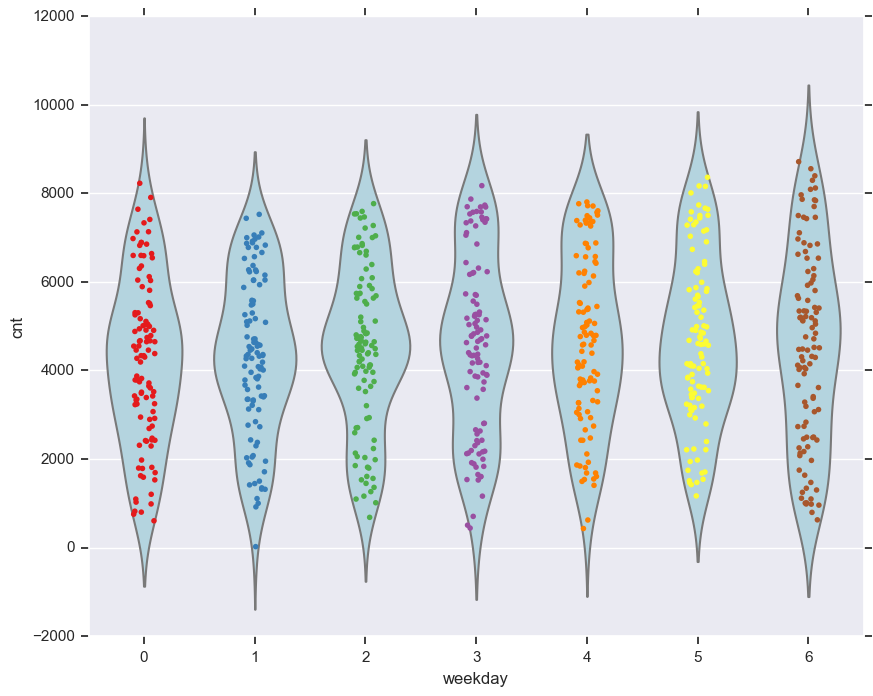

In [124]:
plt.figure(figsize=(10,8))
_ = sns.violinplot(x='weekday',y='cnt',data=df,inner=None,color='lightblue')
_ = sns.stripplot(x='weekday',y='cnt',data=df,size=4,jitter=True)
plt.title('')
plt.show()

In [125]:
#We will plot some Bee Swarmplots Becouse unlike histogram there is no binnig bias involved

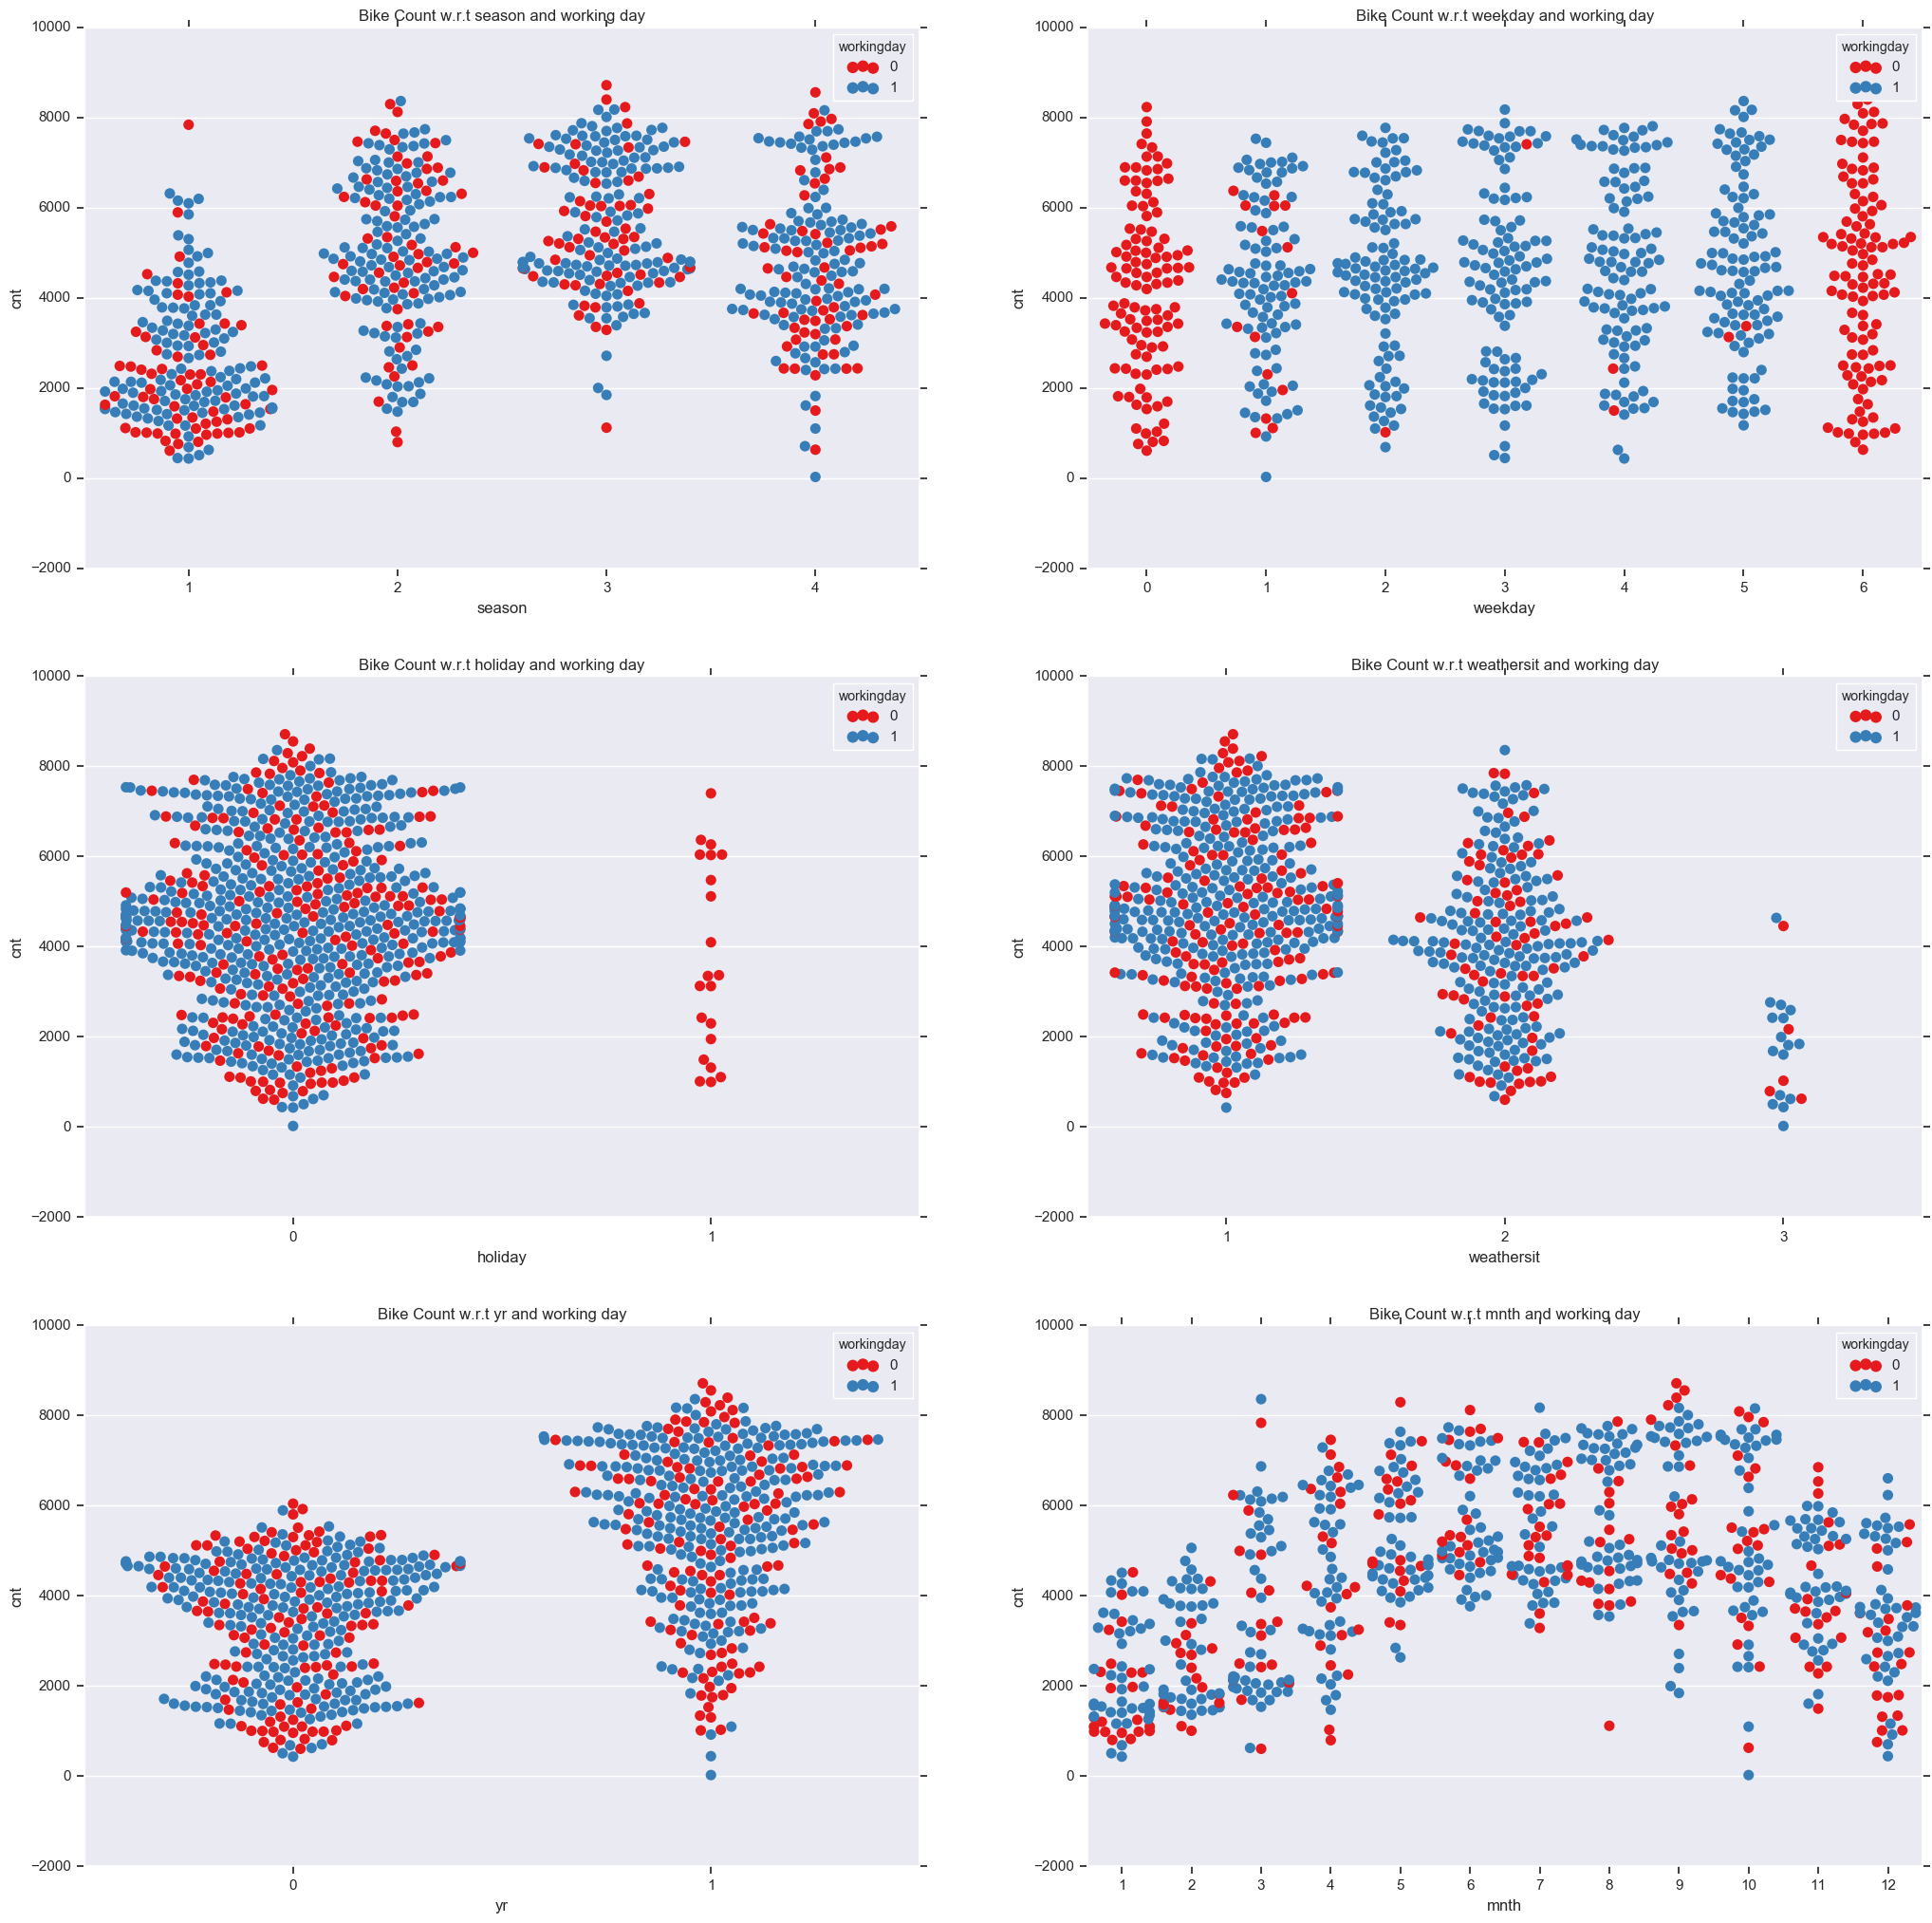

In [126]:
plt.figure(figsize=(25,25))
plt.subplot(321)
_ = sns.swarmplot(x='season',y='cnt',data=df,hue='workingday',size=8)
plt.title('Bike Count w.r.t season and working day')
plt.subplot(322)
_ = sns.swarmplot(x='weekday',y='cnt',data=df,hue='workingday',size=8)
plt.title('Bike Count w.r.t weekday and working day')
plt.subplot(323)
_ = sns.swarmplot(x='holiday',y='cnt',data=df,hue='workingday',size=8)
plt.title('Bike Count w.r.t holiday and working day')
plt.subplot(324)
_ = sns.swarmplot(x='weathersit',y='cnt',data=df,hue='workingday',size=8)
plt.title('Bike Count w.r.t weathersit and working day')
plt.subplot(325)
_ = sns.swarmplot(x='yr',y='cnt',data=df,hue='workingday',size=8)
plt.title('Bike Count w.r.t yr and working day')
plt.subplot(326)
_ = sns.swarmplot(x='mnth',y='cnt',data=df,hue='workingday',size=8)
plt.title('Bike Count w.r.t mnth and working day')
plt.savefig('Bee Swarmplots.png')
plt.show()

In [127]:
temp = df['temp']
temp=temp['2011']
atemp = df['atemp']
atemp = atemp['2011']
hum = df['hum']
hum = hum['2011']
windspeed = df['windspeed']
windspeed = windspeed['2011']
temp_index = temp.index[::30]
labels = temp_index.strftime('%b %d')
labels

array(['Jan 01', 'Jan 31', 'Mar 02', 'Apr 01', 'May 01', 'May 31',
       'Jun 30', 'Jul 30', 'Aug 29', 'Sep 28', 'Oct 28', 'Nov 27', 'Dec 27'], 
      dtype='<U6')

In [128]:
#Now we will do some Time Series Analysis

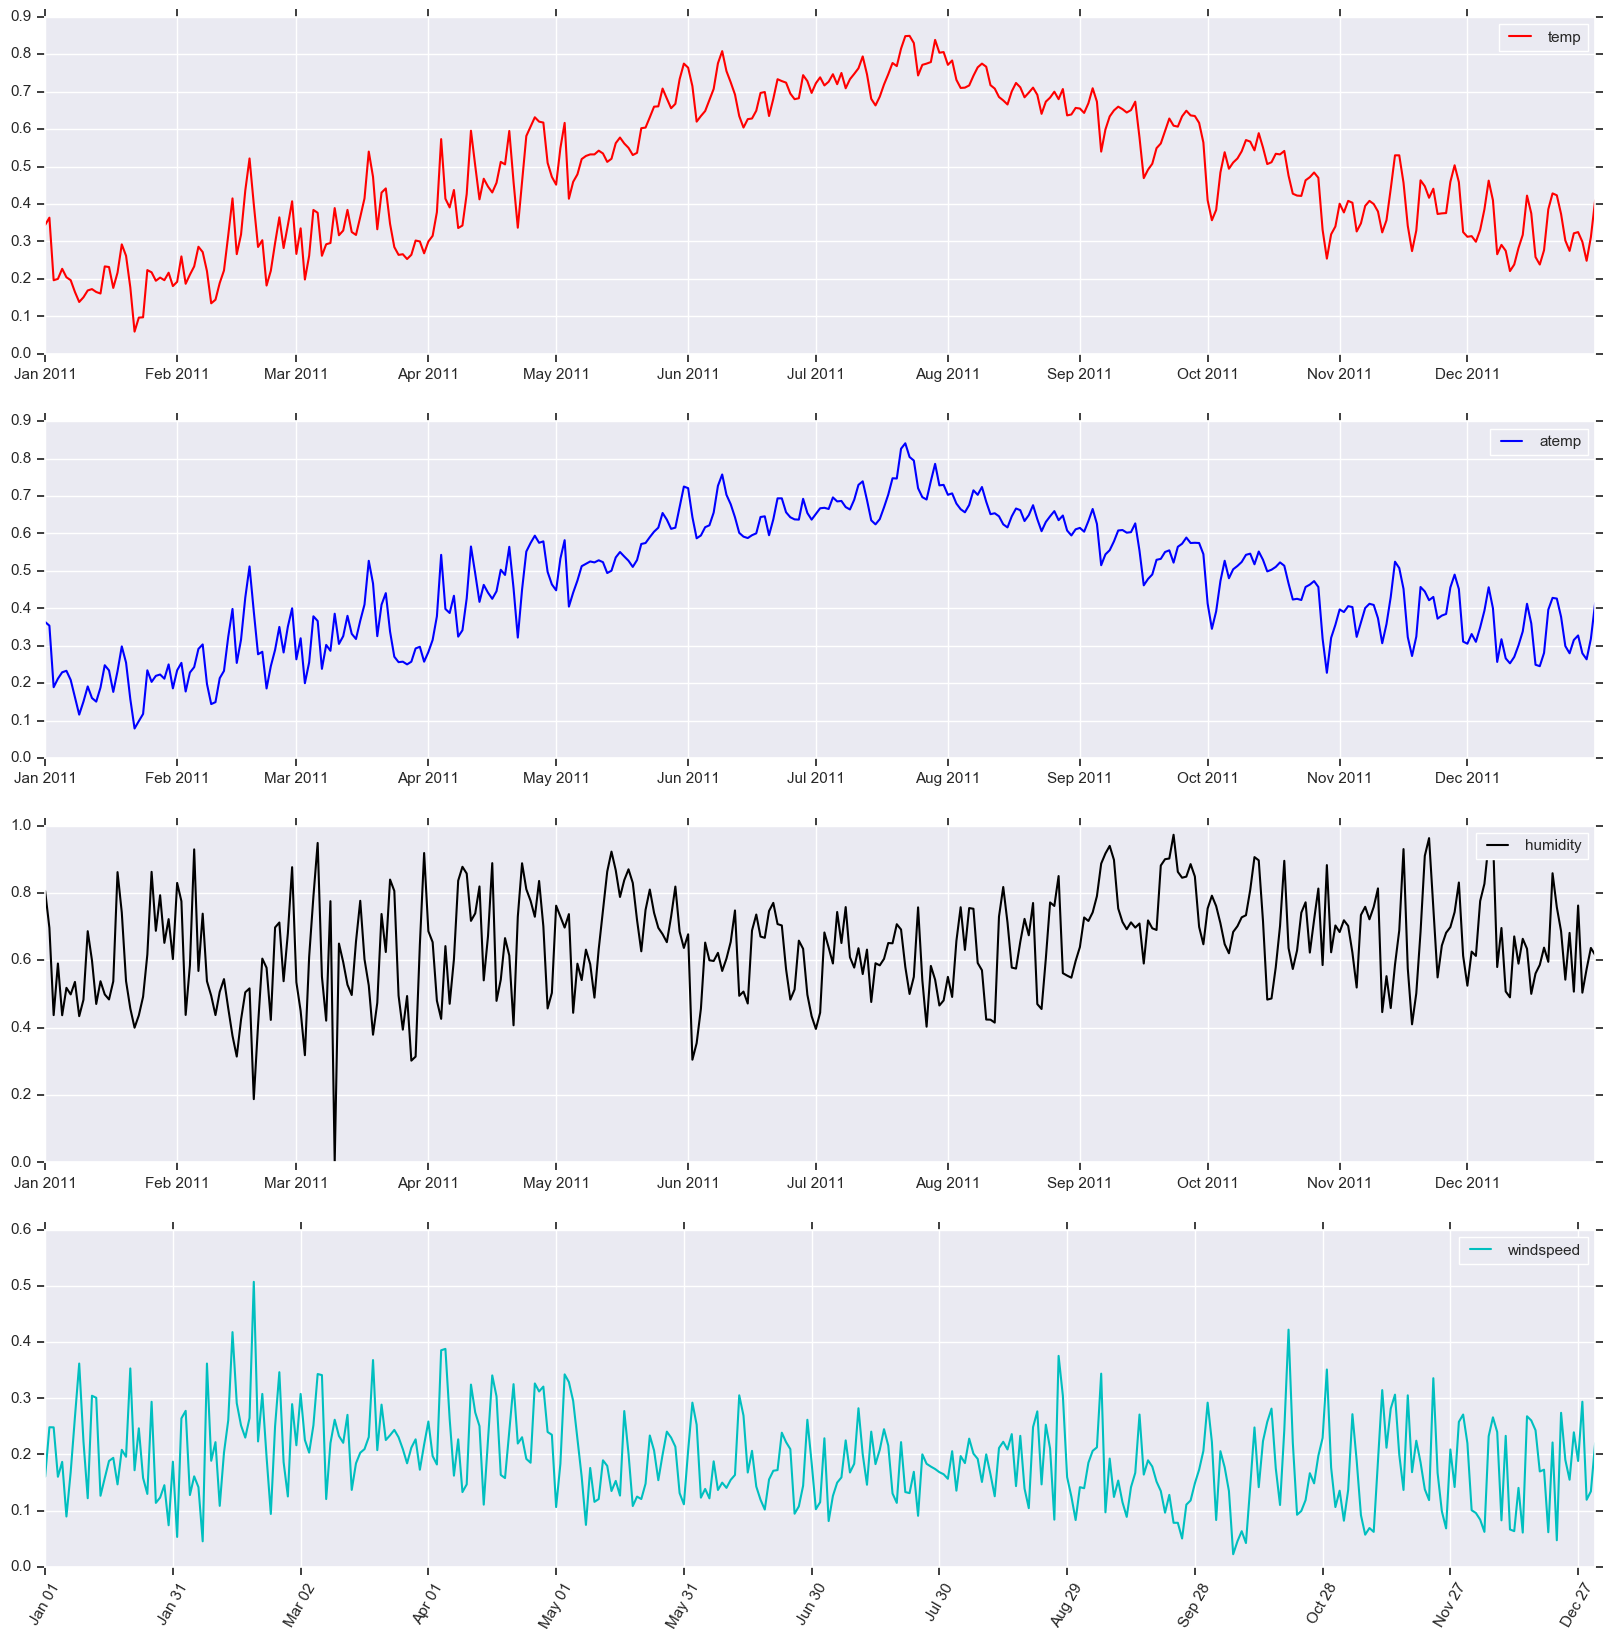

In [129]:
plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(temp,color = 'r',label = 'temp')
plt.legend(loc = 1)
plt.subplot(412)
plt.plot(atemp,color = 'b',label = 'atemp')
plt.legend(loc = 1)
plt.subplot(413)
plt.plot(hum,color = 'k',label = 'humidity')
plt.legend(loc = 1)
plt.subplot(414)
plt.plot(windspeed,color = 'c',label = 'windspeed')
plt.xticks(temp_index,labels,rotation=60)
plt.legend(loc = 1)
plt.show()

In [130]:
#Now we will see at some Jointplots.
#They are used for Bivariate Analysis.
#Here we have plotted Scatter plot with Regression line between 2 variables along with separate Bar plots of both variables.
#Also we have annotated pearson correlation coefficient and p value 

C:\Users\Asus\Anaconda4\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\Asus\Anaconda4\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


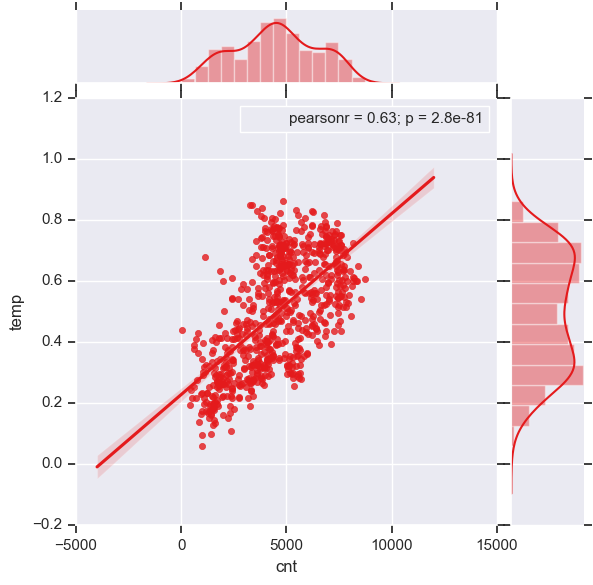

In [131]:
_= sns.jointplot(x='cnt',y='temp',data=df,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

C:\Users\Asus\Anaconda4\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\Asus\Anaconda4\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


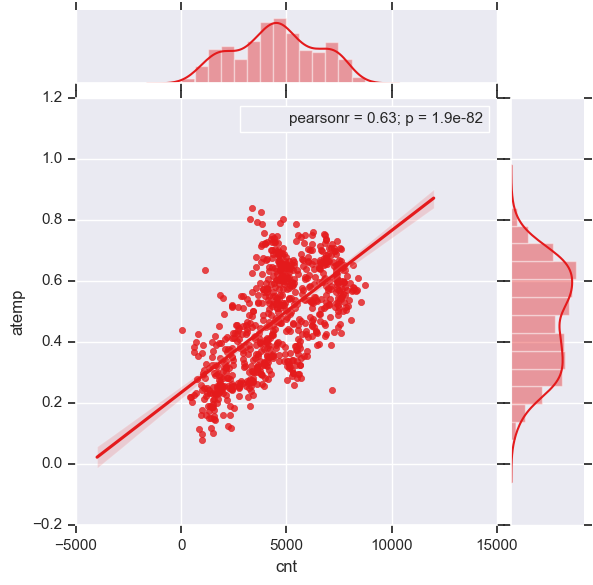

In [132]:
_= sns.jointplot(x='cnt',y='atemp',data=df,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

C:\Users\Asus\Anaconda4\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\Asus\Anaconda4\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


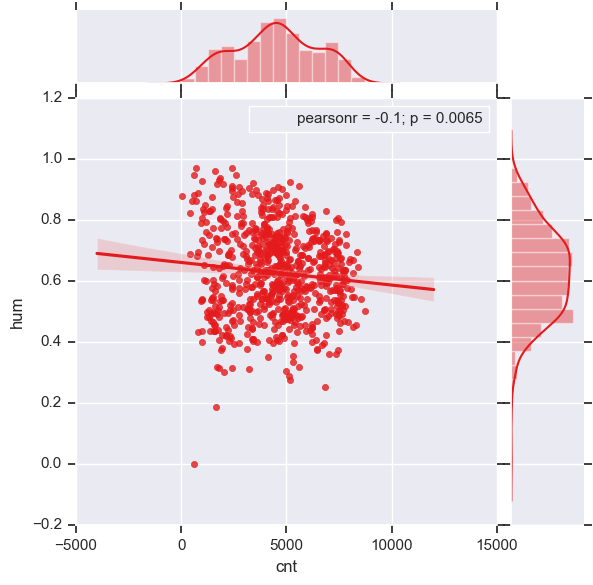

In [133]:
_= sns.jointplot(x='cnt',y='hum',data=df,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

C:\Users\Asus\Anaconda4\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\Asus\Anaconda4\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


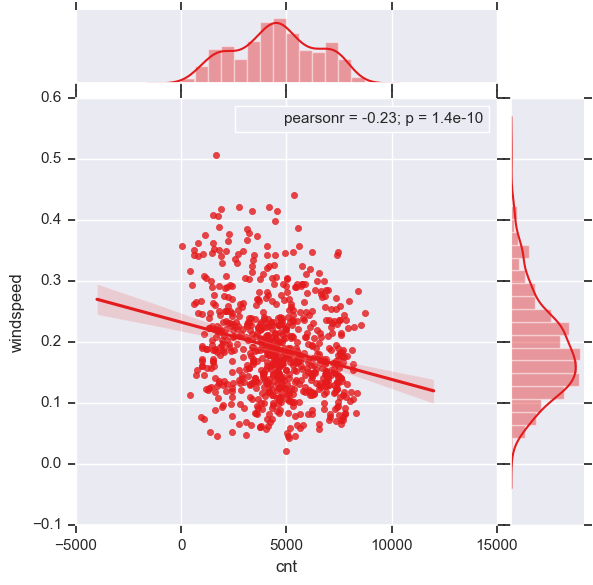

In [134]:
_= sns.jointplot(x='cnt',y='windspeed',data=df,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

# EDA - Data type conversion

In [135]:
cat_var=['season','holiday','weekday','workingday','weathersit','yr','mnth']
df[cat_var]=df[cat_var].apply(lambda x: x.astype('category') )
num_var=['temp','atemp','hum','windspeed']

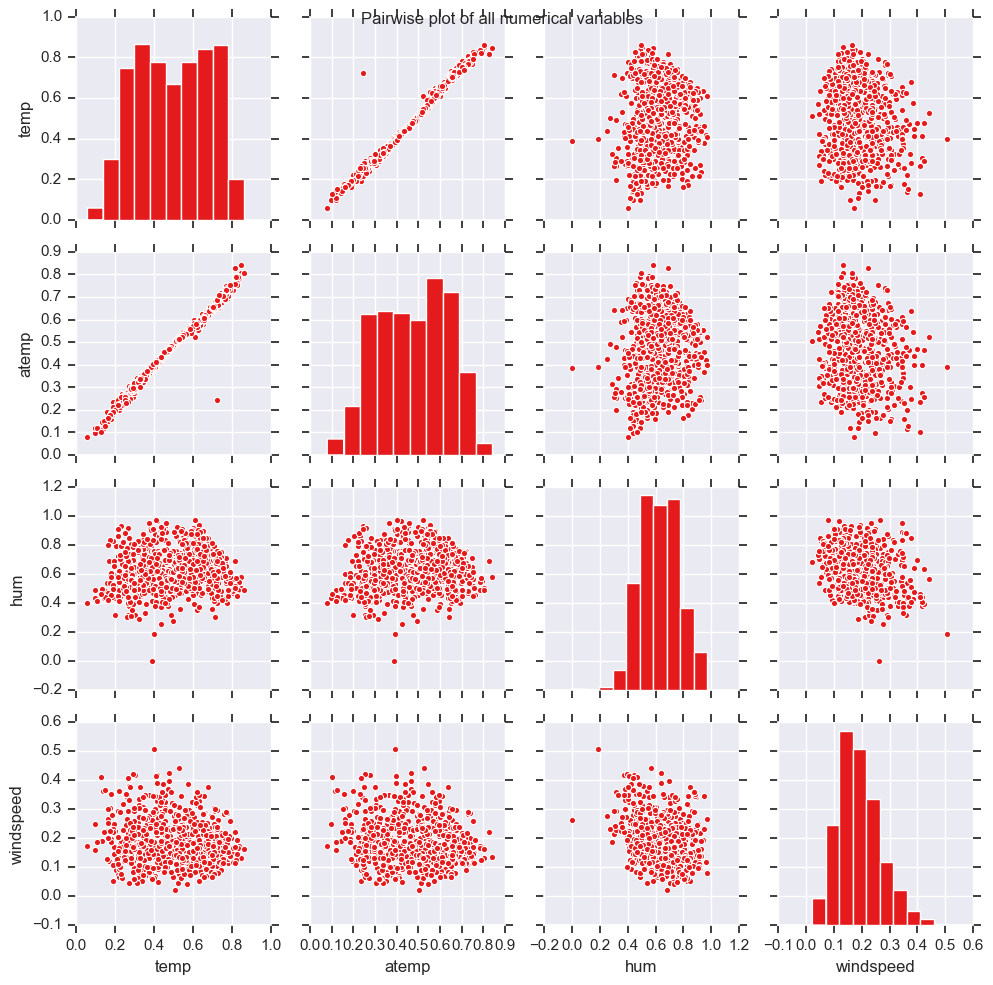

In [136]:
#Pairplot for all numerical variables
_ =sns.pairplot(data=df[num_var],kind='scatter')
_.fig.suptitle('Pairwise plot of all numerical variables')
plt.show()

# Missing Value Analysis

In [137]:
pd.DataFrame(df.isnull().sum())

0
season      0
yr          0
mnth        0
holiday     0
weekday     0
workingday  0
weathersit  0
temp        0
atemp       0
hum         0
windspeed   0
casual      0
registered  0
cnt         0

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Freq: D
Data columns (total 14 columns):
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(7), float64(4), int64(3)
memory usage: 50.9 KB


# Outlier Analysis using Boxplot

In [139]:
# Univariate Boxplots: Boxplots for all Numerical Variables also for target variable.

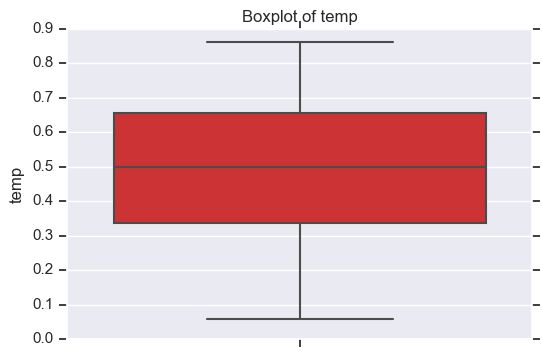

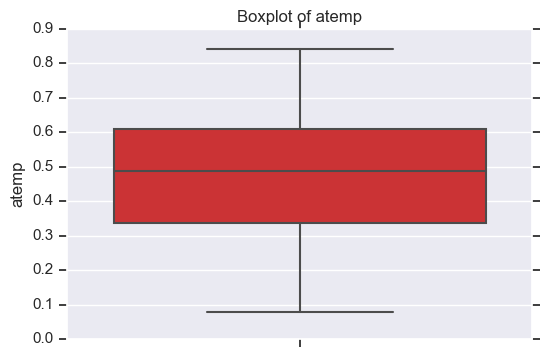

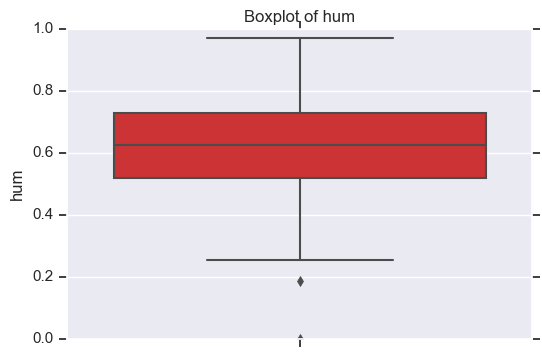

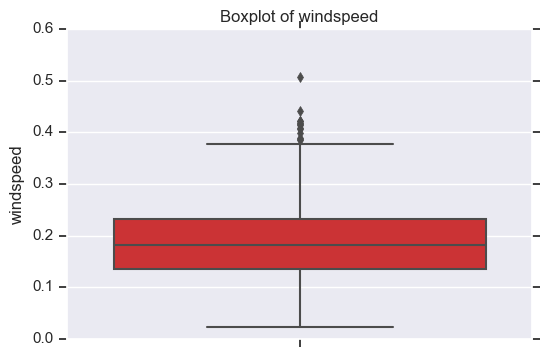

In [140]:
for i in num_var:
    sns.boxplot(y=i,data=df)
    plt.title('Boxplot of '+i)
    plt.show()

In [141]:
#Bivariate Boxplots: Boxplots for all Numerical Variables Vs all Categorical Variables

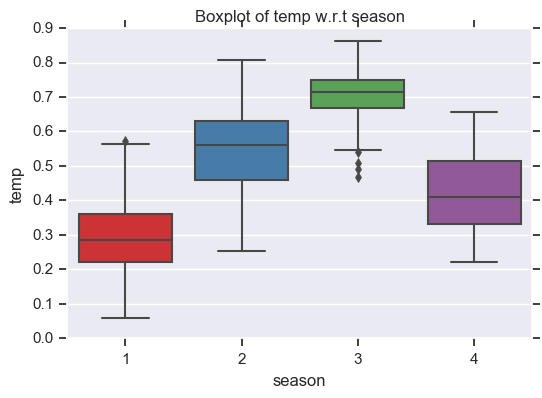

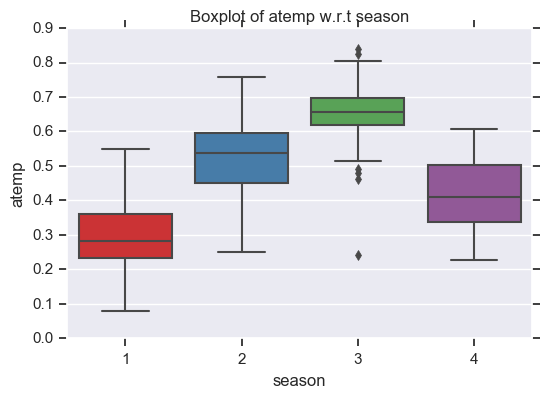

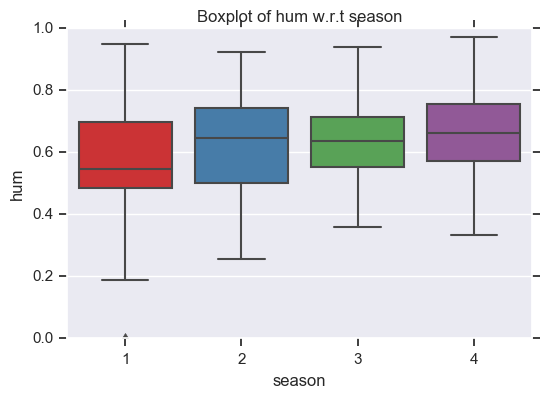

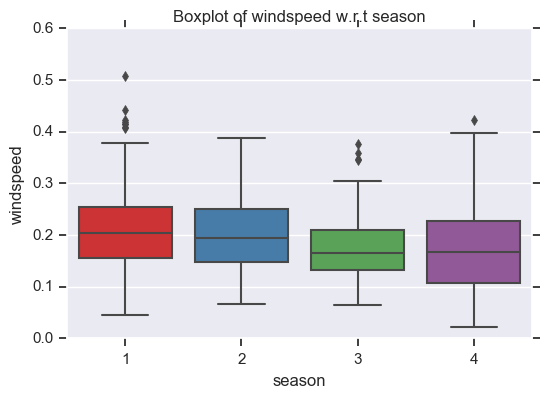

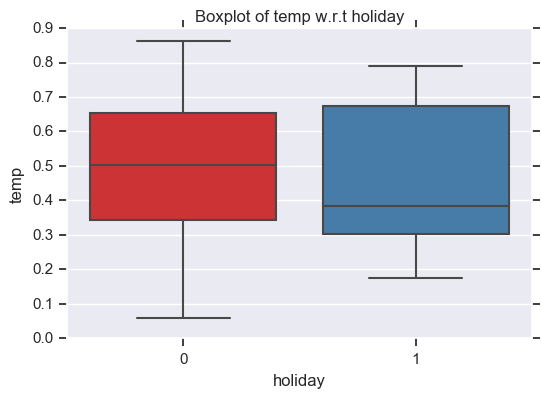

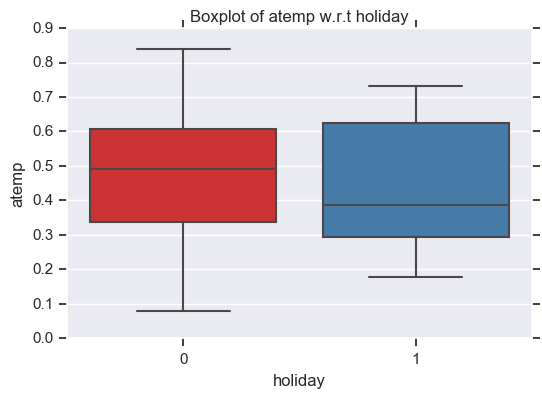

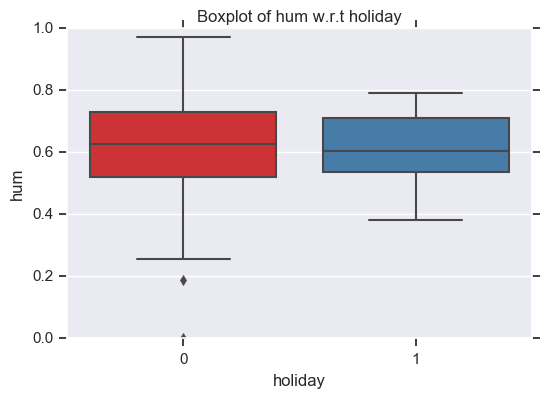

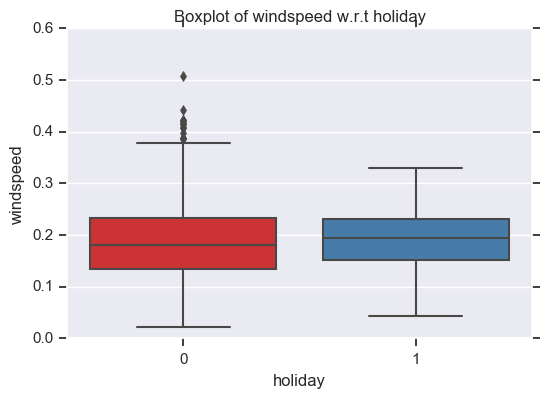

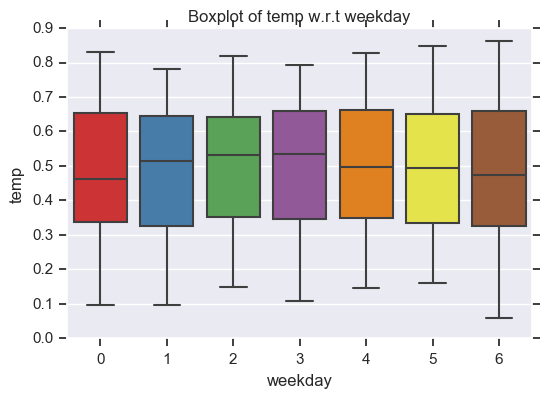

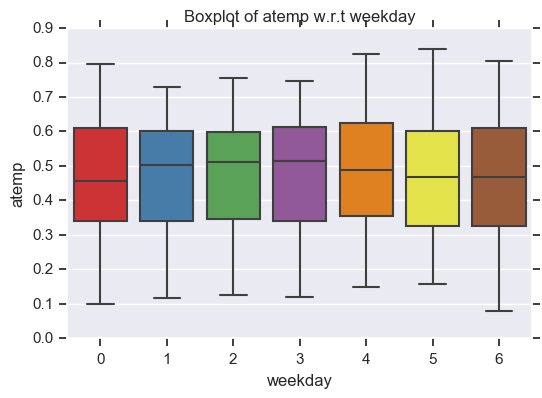

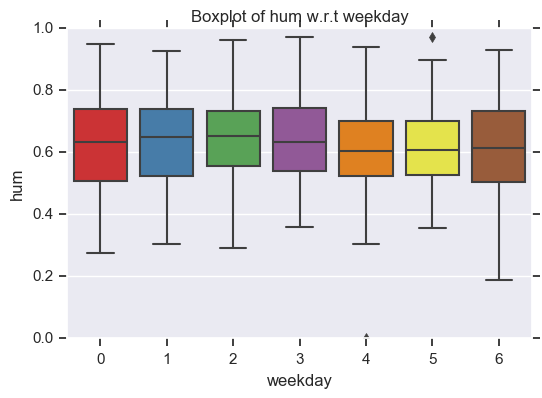

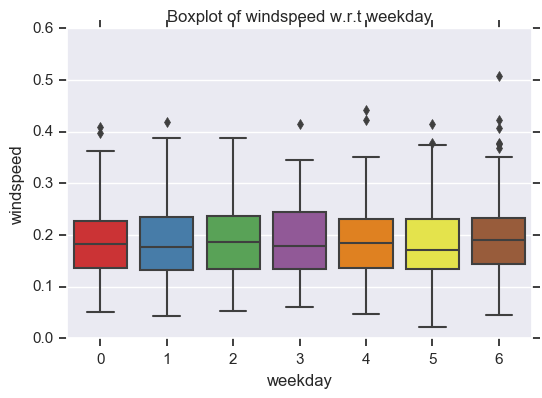

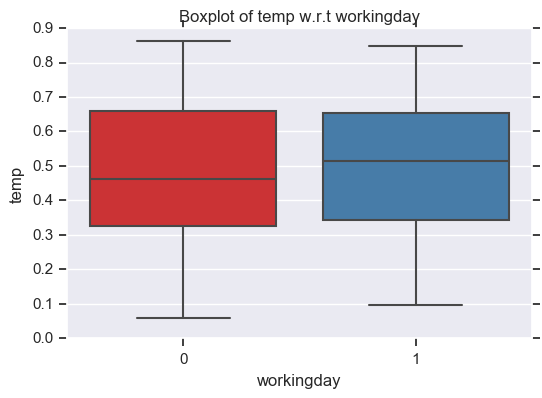

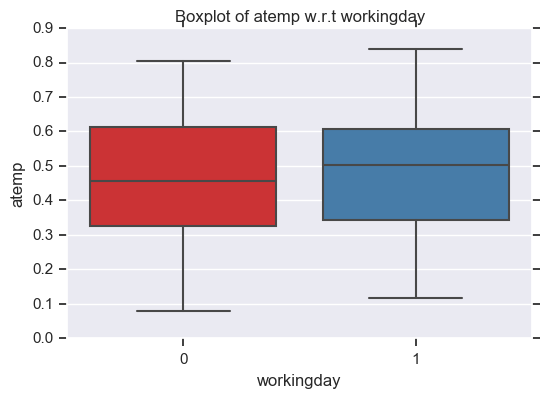

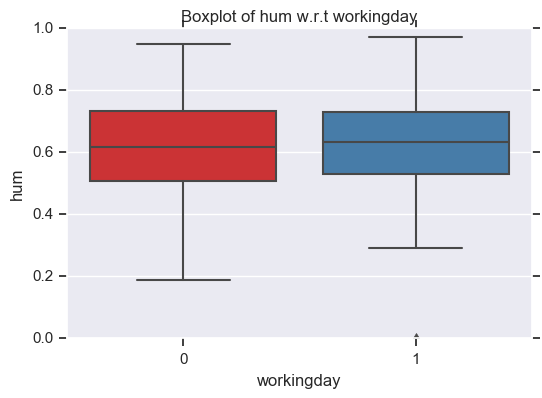

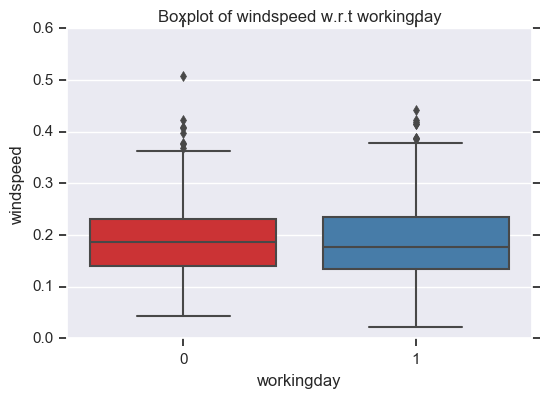

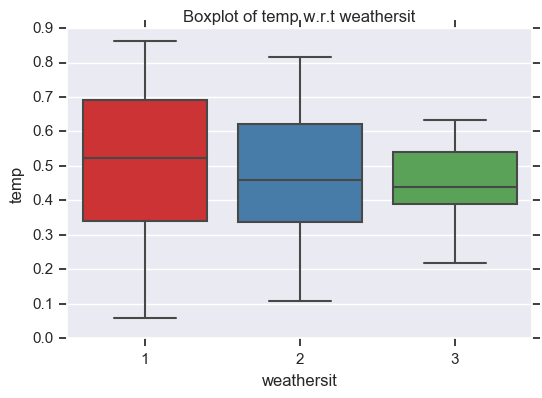

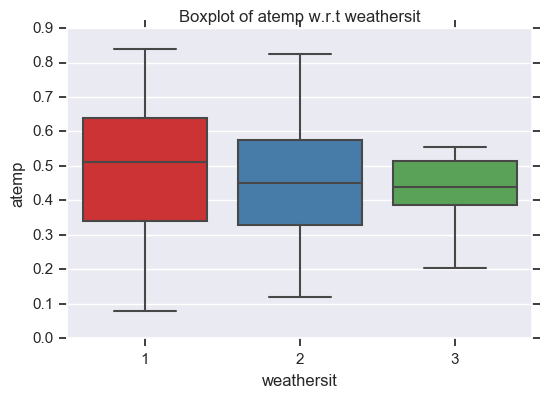

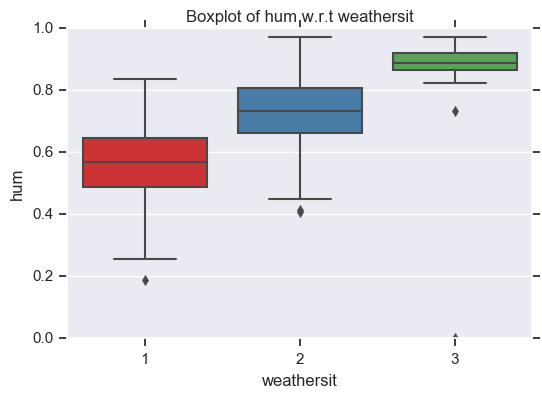

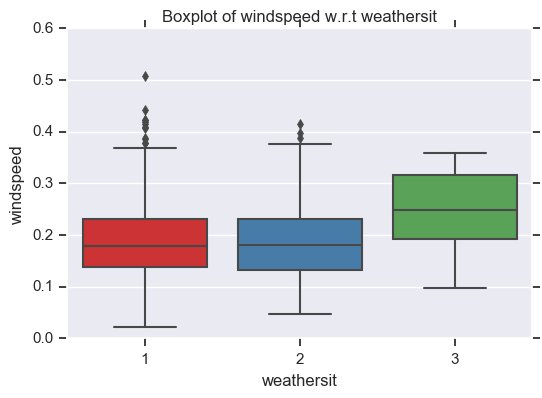

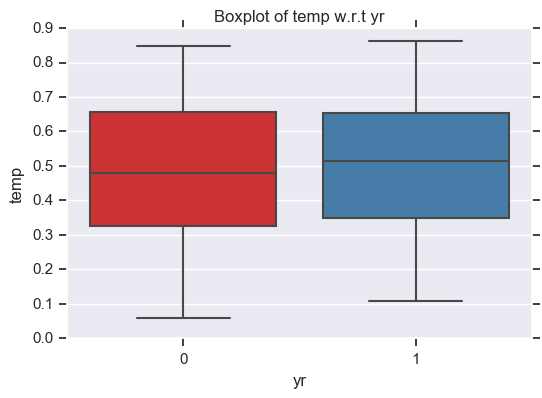

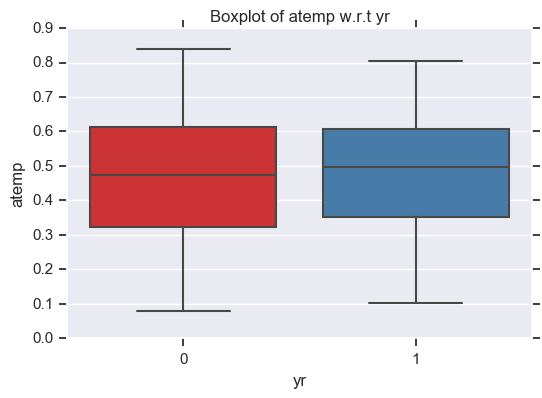

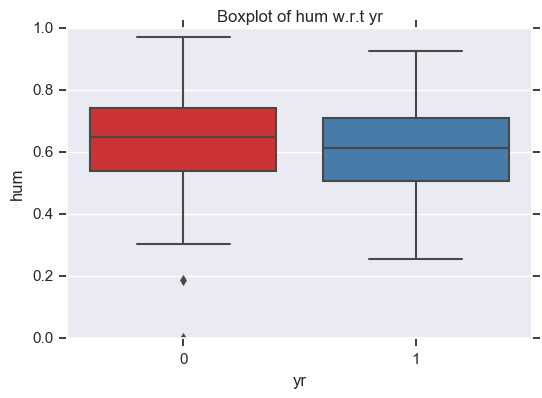

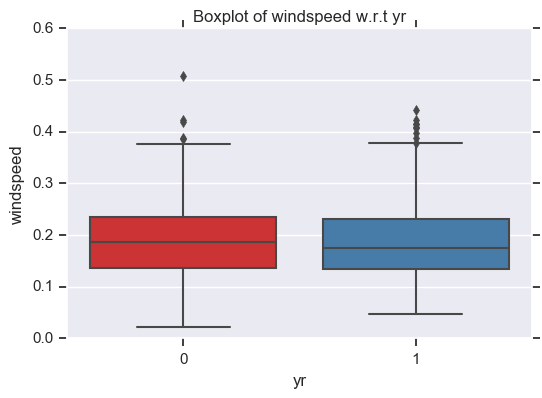

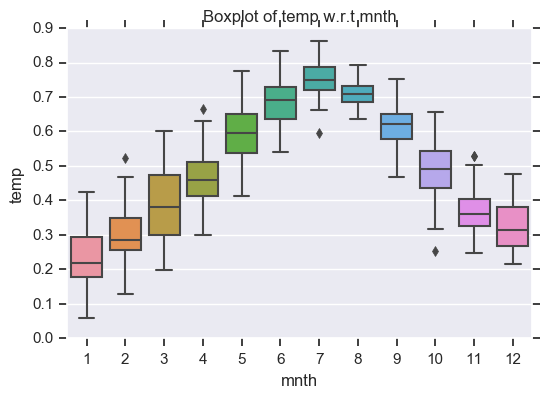

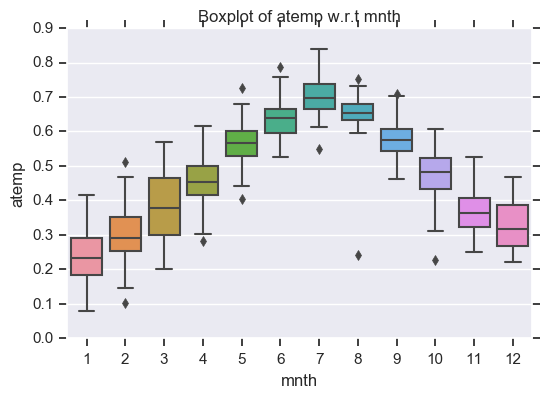

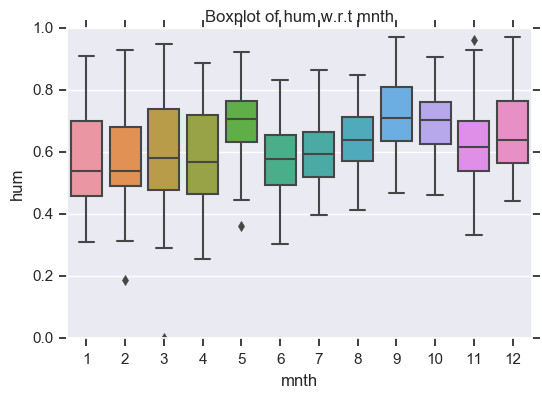

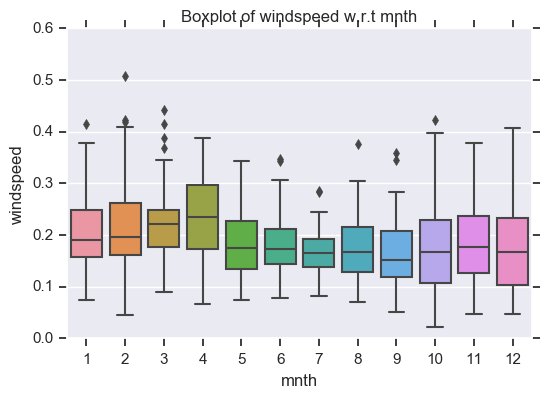

In [142]:
for a in cat_var:
    for b in num_var:
        _ = sns.boxplot(x=a,y=b,data=df)
        plt.title('Boxplot of '+b+' w.r.t '+a)
        plt.show()

In [143]:
#Outlier Treatment


In [144]:
df.std()

season           1.110807
yr               0.500342
mnth             3.451913
holiday          0.167155
weekday          2.004787
workingday       0.465233
weathersit       0.544894
temp             0.183051
atemp            0.162961
hum              0.142429
windspeed        0.077498
casual         686.622488
registered    1560.256377
cnt           1937.211452
dtype: float64

In [145]:
# Std Deviation before outlier treatment :
#standard deviation for 'hum'= 0.142429
#standard deviation for 'windspeed'= 0.077498

In [146]:
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(df[col], [75 ,25])
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    #Replace with NA
    df.loc[df[col] < minimum,col] = np.nan
    df.loc[df[col] > maximum,col] = np.nan

In [147]:
outlier_treatment('hum')

In [148]:
df['hum'].isnull().sum()

2

In [149]:
# We have checked standard deviation for 3 imputation methods-mean,median,KNN and standard deviation remains nearly same with KNN imputation. so, KNN is selected for imputation method.
# And we have also checked standard deviation for different values of K for KNN and we have selected K=3 for 'hum' and K=1 for 'windspeed'.

In [150]:
#Imputing with missing values using KNN
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns, index=df.index)

NameError: name 'KNN' is not defined

In [151]:
# #Impute with mean
#df['hum'] = df['hum'].fillna(df['hum'].median())
# #Impute with median
#df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [152]:
df['hum'] = df['hum'].fillna(df['hum'].median())

In [153]:
df['hum']

dteday
2011-01-01    0.805833
2011-01-02    0.696087
2011-01-03    0.437273
2011-01-04    0.590435
2011-01-05    0.436957
2011-01-06    0.518261
2011-01-07    0.498696
2011-01-08    0.535833
2011-01-09    0.434167
2011-01-10    0.482917
2011-01-11    0.686364
2011-01-12    0.599545
2011-01-13    0.470417
2011-01-14    0.537826
2011-01-15    0.498750
2011-01-16    0.483750
2011-01-17    0.537500
2011-01-18    0.861667
2011-01-19    0.741739
2011-01-20    0.538333
2011-01-21    0.457083
2011-01-22    0.400000
2011-01-23    0.436522
2011-01-24    0.491739
2011-01-25    0.616957
2011-01-26    0.862500
2011-01-27    0.687500
2011-01-28    0.793043
2011-01-29    0.651739
2011-01-30    0.722174
                ...   
2012-12-02    0.823333
2012-12-03    0.767500
2012-12-04    0.733750
2012-12-05    0.485000
2012-12-06    0.508750
2012-12-07    0.764167
2012-12-08    0.911250
2012-12-09    0.905417
2012-12-10    0.925000
2012-12-11    0.596667
2012-12-12    0.538333
2012-12-13    0.485833
2012

In [154]:
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [155]:
df['windspeed'] 

dteday
2011-01-01    0.160446
2011-01-02    0.248539
2011-01-03    0.248309
2011-01-04    0.160296
2011-01-05    0.186900
2011-01-06    0.089565
2011-01-07    0.168726
2011-01-08    0.266804
2011-01-09    0.361950
2011-01-10    0.223267
2011-01-11    0.122132
2011-01-12    0.304627
2011-01-13    0.301000
2011-01-14    0.126548
2011-01-15    0.157963
2011-01-16    0.188433
2011-01-17    0.194017
2011-01-18    0.146775
2011-01-19    0.208317
2011-01-20    0.195904
2011-01-21    0.353242
2011-01-22    0.171970
2011-01-23    0.246600
2011-01-24    0.158330
2011-01-25    0.129796
2011-01-26    0.293850
2011-01-27    0.113837
2011-01-28    0.123300
2011-01-29    0.145365
2011-01-30    0.073983
                ...   
2012-12-02    0.124379
2012-12-03    0.082721
2012-12-04    0.174129
2012-12-05    0.324021
2012-12-06    0.174754
2012-12-07    0.130600
2012-12-08    0.101379
2012-12-09    0.157975
2012-12-10    0.190308
2012-12-11    0.296037
2012-12-12    0.162937
2012-12-13    0.174129
2012

In [156]:
df.std()

season           1.110807
yr               0.500342
mnth             3.451913
holiday          0.167155
weekday          2.004787
workingday       0.465233
weathersit       0.544894
temp             0.183051
atemp            0.162961
hum              0.139566
windspeed        0.077498
casual         686.622488
registered    1560.256377
cnt           1937.211452
dtype: float64

### Standard Deviation after outlier treatment :
standard deviation for 'hum'= 0.139566

standard deviation for 'windspeed'= 0.077498

In [157]:
df.head()

season yr mnth holiday weekday workingday weathersit      temp  \
dteday                                                                      
2011-01-01      1  0    1       0       6          0          2  0.344167   
2011-01-02      1  0    1       0       0          0          2  0.363478   
2011-01-03      1  0    1       0       1          1          1  0.196364   
2011-01-04      1  0    1       0       2          1          1  0.200000   
2011-01-05      1  0    1       0       3          1          1  0.226957   

               atemp       hum  windspeed  casual  registered   cnt  
dteday                                                               
2011-01-01  0.363625  0.805833   0.160446     331         654   985  
2011-01-02  0.353739  0.696087   0.248539     131         670   801  
2011-01-03  0.189405  0.437273   0.248309     120        1229  1349  
2011-01-04  0.212122  0.590435   0.160296     108        1454  1562  
2011-01-05  0.229270  0.436957   0.186900      82        1518  1600

### Feature Selection
Correlation Analysis for Numerical Variables/Features

We will plot a Heatmap of correlation whereas, correlation measures how strongly 2 quantities are related to each other.

We go for correlation to avoid redundant information in our model development.

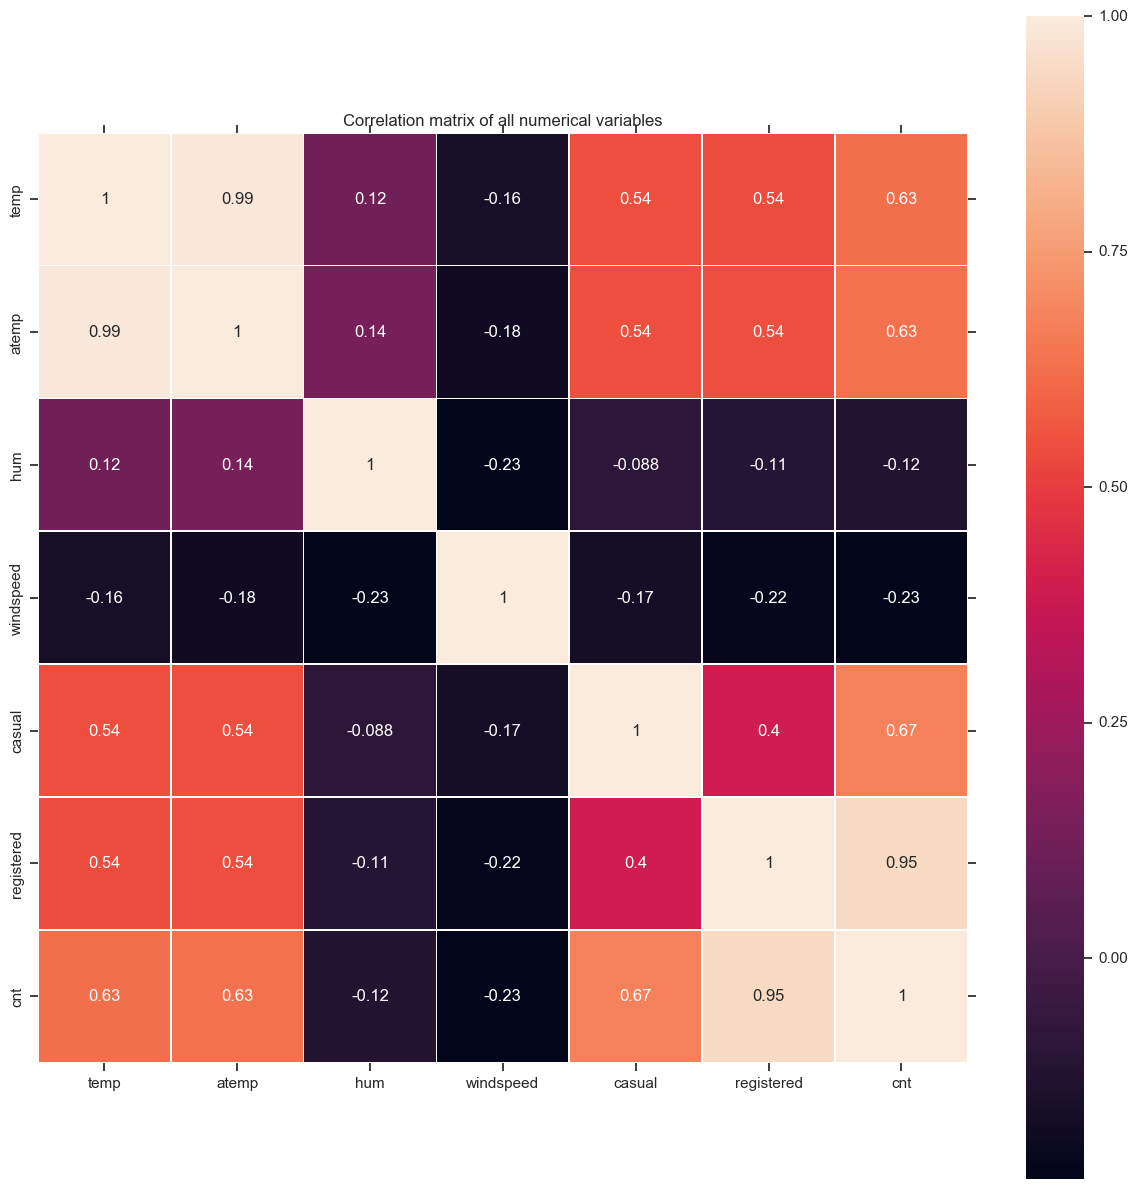

In [158]:
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(df[['temp','atemp','hum','windspeed','casual', 'registered','cnt']].corr(),linewidths=0.5,linecolor='w',square=True,annot=True)
plt.title('Correlation matrix of all numerical variables') 
plt.show()

In [159]:
# from Above heat map we know that :-
#'temp' and 'atemp' are very highly correlated with each other.
# similarly, 'registered' and 'cnt' are highly correlated with each other.
# we also came to know that--'cnt'='casual'+'registered' 

### Chi-square test of Independence for Categorical Variables/Features
Hypothesis testing :

Null Hypothesis: 2 variables are independent.

Alternate Hypothesis: 2 variables are not independent.

If p-value is less than 0.05 then we reject the null hypothesis saying that 2 variables are dependent.

And if p-value is greater than 0.05 then we accept the null hypothesis saying that 2 variables are independent.

There should be no dependencies between Independent variables.

So we will remove that variable whose p-value with other variable is low than 0.05.

And we will keep that variable whose p-value with other variable is high than 0.05

In [160]:
#loop for chi square values
for i in cat_var:
    for j in cat_var:
        if(i != j):
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(df[i], df[j]))
            if(p < 0.05):
                print(i,"and",j,"are dependent on each other with",p,'----Remove')
            else:
                print(i,"and",j,"are independent on each other with",p,'----Keep') 

season and holiday are independent on each other with 0.683168707304 ----Keep
season and weekday are independent on each other with 0.999999999999 ----Keep
season and workingday are independent on each other with 0.886556836402 ----Keep
season and weathersit are dependent on each other with 0.0211793010447 ----Remove
season and yr are independent on each other with 0.999928808425 ----Keep
season and mnth are dependent on each other with 0.0 ----Remove
holiday and season are independent on each other with 0.683168707304 ----Keep
holiday and weekday are dependent on each other with 8.56705534462e-11 ----Remove
holiday and workingday are dependent on each other with 4.03337093545e-11 ----Remove
holiday and weathersit are independent on each other with 0.600857221345 ----Keep
holiday and yr are independent on each other with 0.994924727986 ----Keep
holiday and mnth are independent on each other with 0.559308308604 ----Keep
weekday and season are independent on each other with 0.99999999999

In [161]:
###### variables which are highly dependent on each other based on p-values are:-
# season and weathersit -> 0.0211
# season and month -> 0
# holiday and weekday -> 8.56e-11
# hoilday and workingday -> 4.033e-11
# weekday and holiday -> 8.56e-11
# weekday and workingday -> 6.77e-136
# workingday and holiday -> 4.033e-11
# workingday and weekday -> 6.77e-11
# weathersit and season -> 0.0211
# weathersit and mnth -> 0.014
# mnth and season -> 0
# mnth and weathersit -> 0.014
 # So besides season,holiday and year we will remove weekday,weathersit,workingday,mnth.


In [162]:
# Back up data
aj = df

In [163]:
df = aj

In [164]:
df = df.drop(['mnth','weekday','weathersit','workingday'],axis=1) 

### Feature Scaling
Let us check variance for each column in dataset before Normalisation

High variance will affect the accuracy of the model. so we want to normalise that variance.

In [165]:
df[num_var].var()

temp         0.033508
atemp        0.026556
hum          0.019479
windspeed    0.006006
dtype: float64

In [166]:
# Distribution before Normaliation

C:\Users\Asus\Anaconda4\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


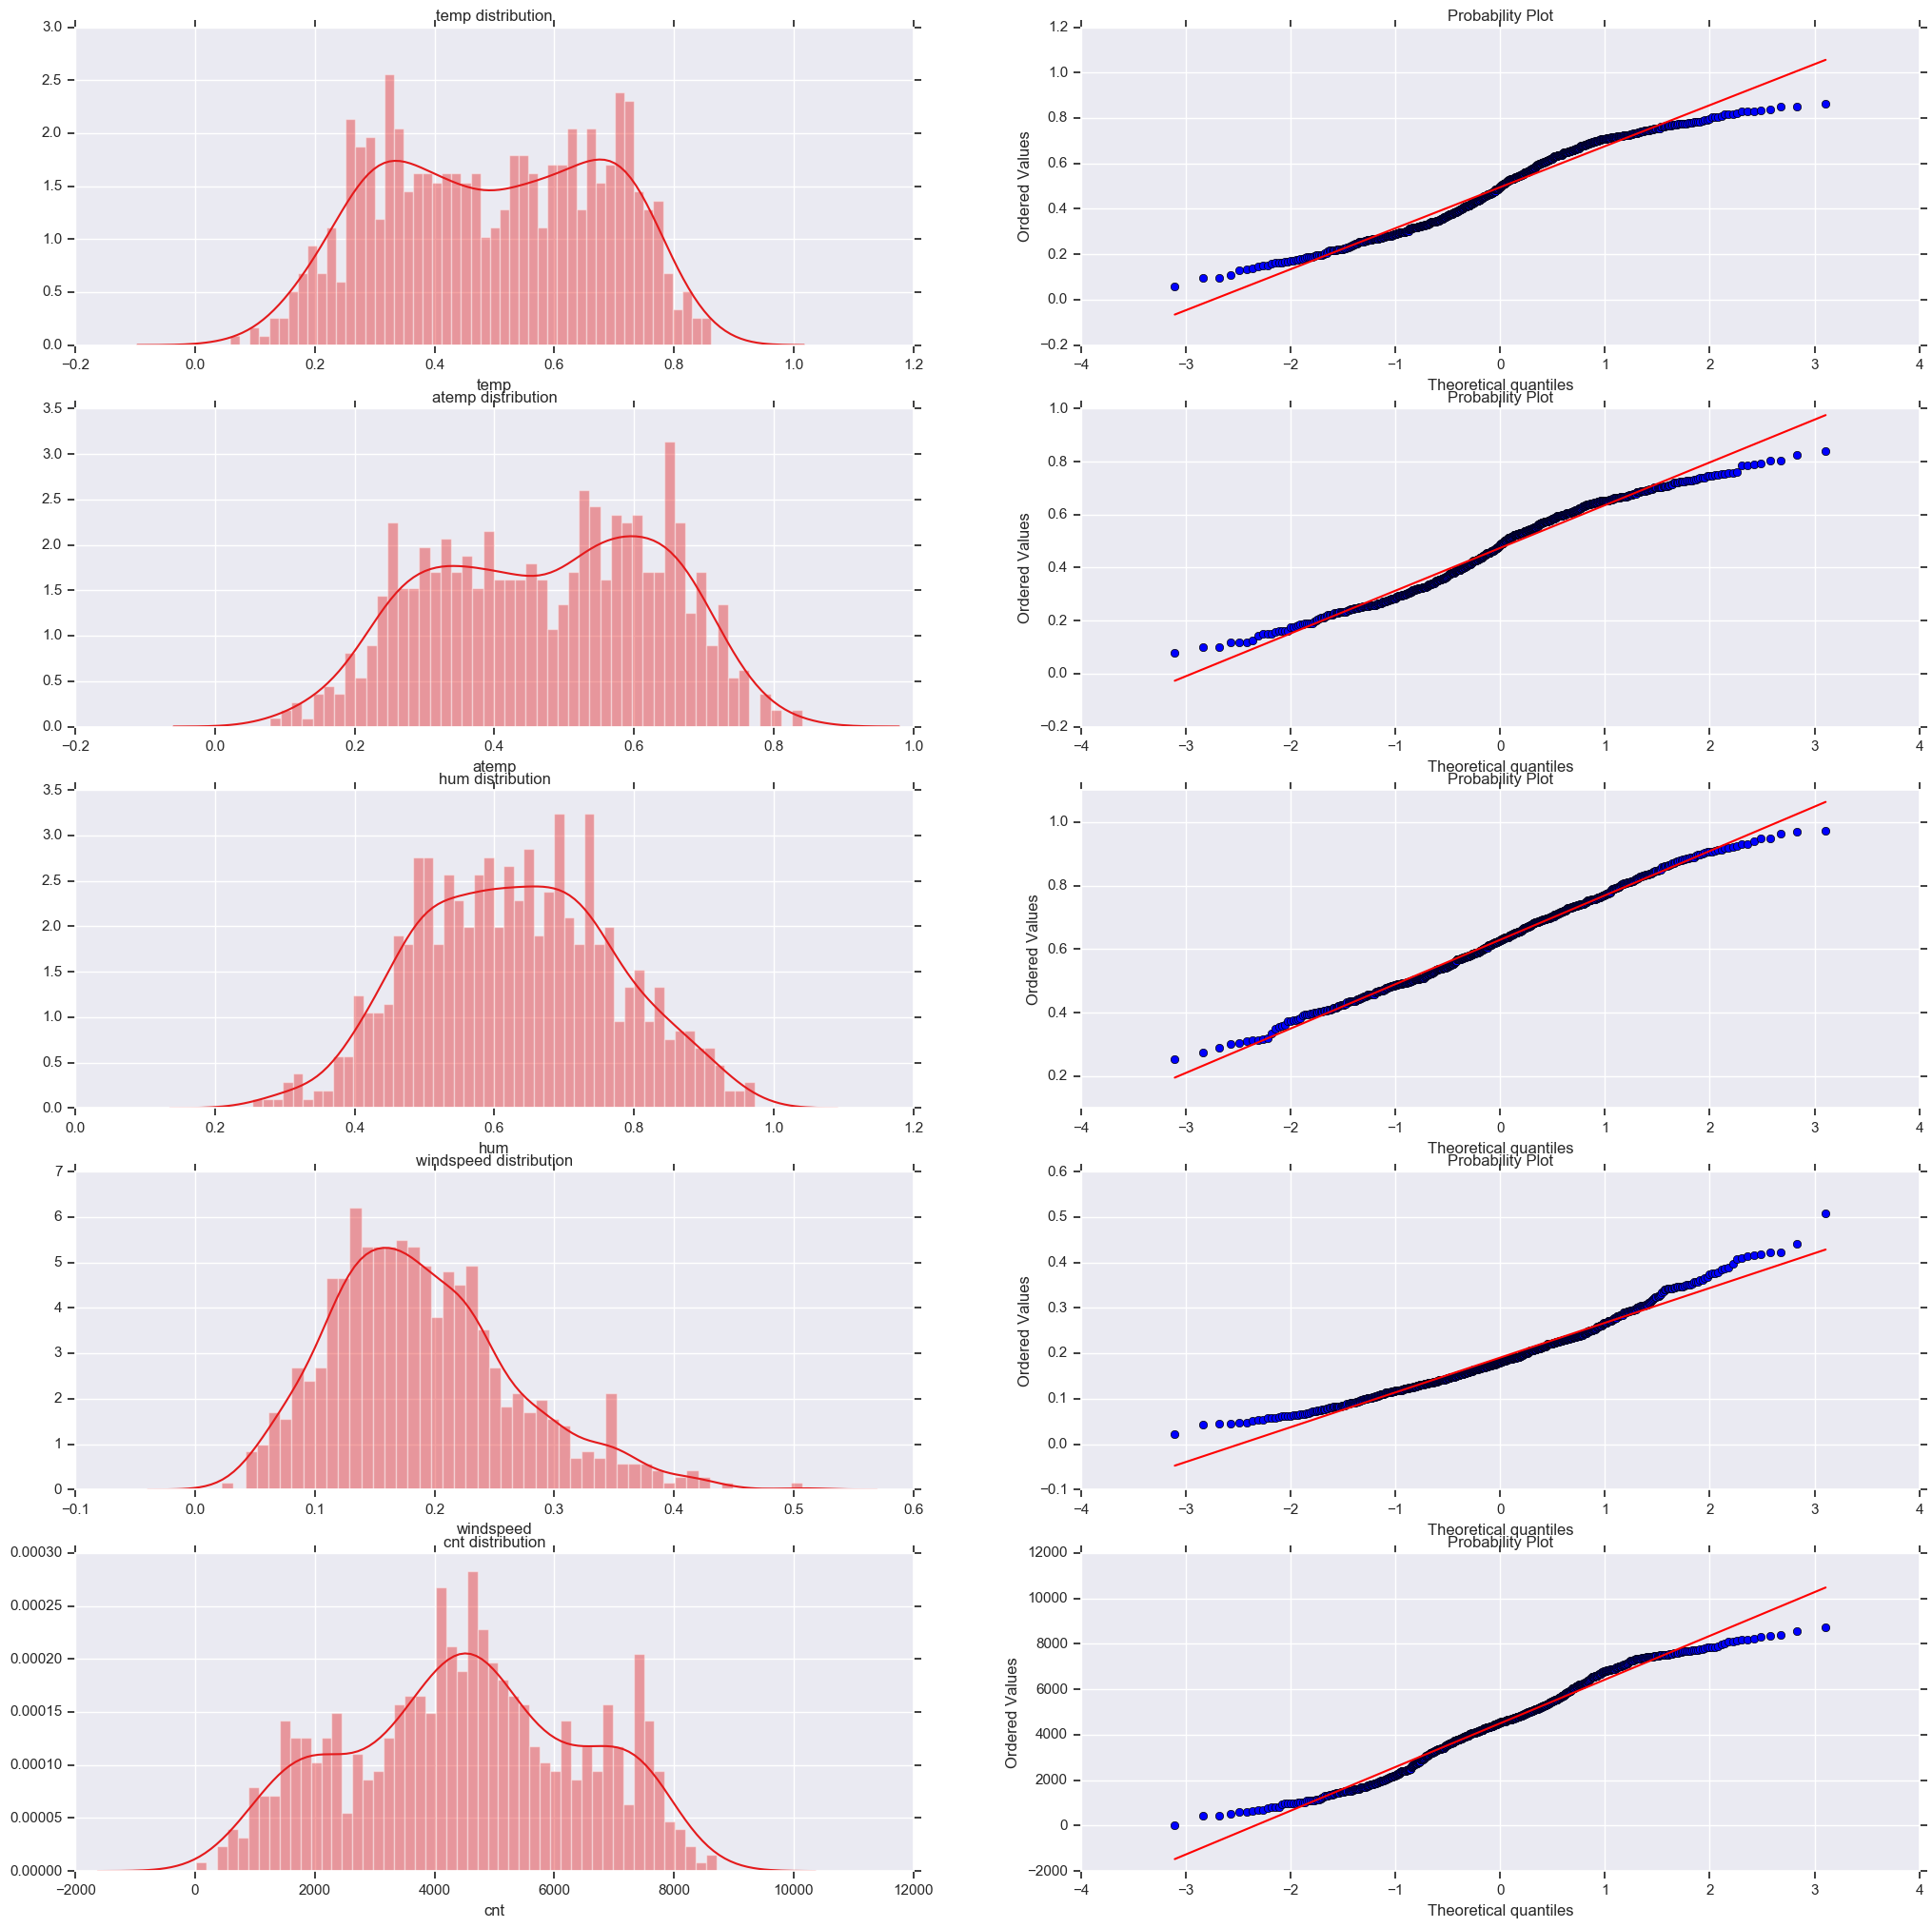

In [167]:
fig,ax = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(25, 25)
sns.distplot(df['temp'],bins =50,ax = ax[0][0])
ax[0][0].set(title="temp distribution")
_ = stats.probplot(df['temp'], dist='norm', fit=True,plot=ax[0][1])
ax[0][1].set(title="Probability Plot")
sns.distplot(df['atemp'],bins =50,ax = ax[1][0])
ax[1][0].set(title="atemp distribution")
_ = stats.probplot(df['atemp'], dist='norm', fit=True,plot=ax[1][1])
ax[1][1].set(title="Probability Plot")
sns.distplot(df['hum'],bins =50,ax = ax[2][0])
ax[2][0].set(title="hum distribution")
_ = stats.probplot(df['hum'], dist='norm', fit=True,plot=ax[2][1])
ax[2][1].set(title="Probability Plot")
sns.distplot(df['windspeed'],bins =50,ax = ax[3][0])
ax[3][0].set(title="windspeed distribution")
_ = stats.probplot(df['windspeed'], dist='norm', fit=True,plot=ax[3][1])
ax[3][1].set(title="Probability Plot")
sns.distplot(df['cnt'],bins =50,ax = ax[4][0])
ax[4][0].set(title="cnt distribution")
_ = stats.probplot(df['cnt'], dist='norm', fit=True,plot=ax[4][1])
ax[4][1].set(title="Probability Plot")
plt.show()

In [168]:
#Normalisation
for i in num_var:
    print(i)
    df[i] = (df[i] - min(df[i]))/(max(df[i]) - min(df[i]))

temp
atemp
hum
windspeed


In [169]:
# Distribution before Normaliation

C:\Users\Asus\Anaconda4\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


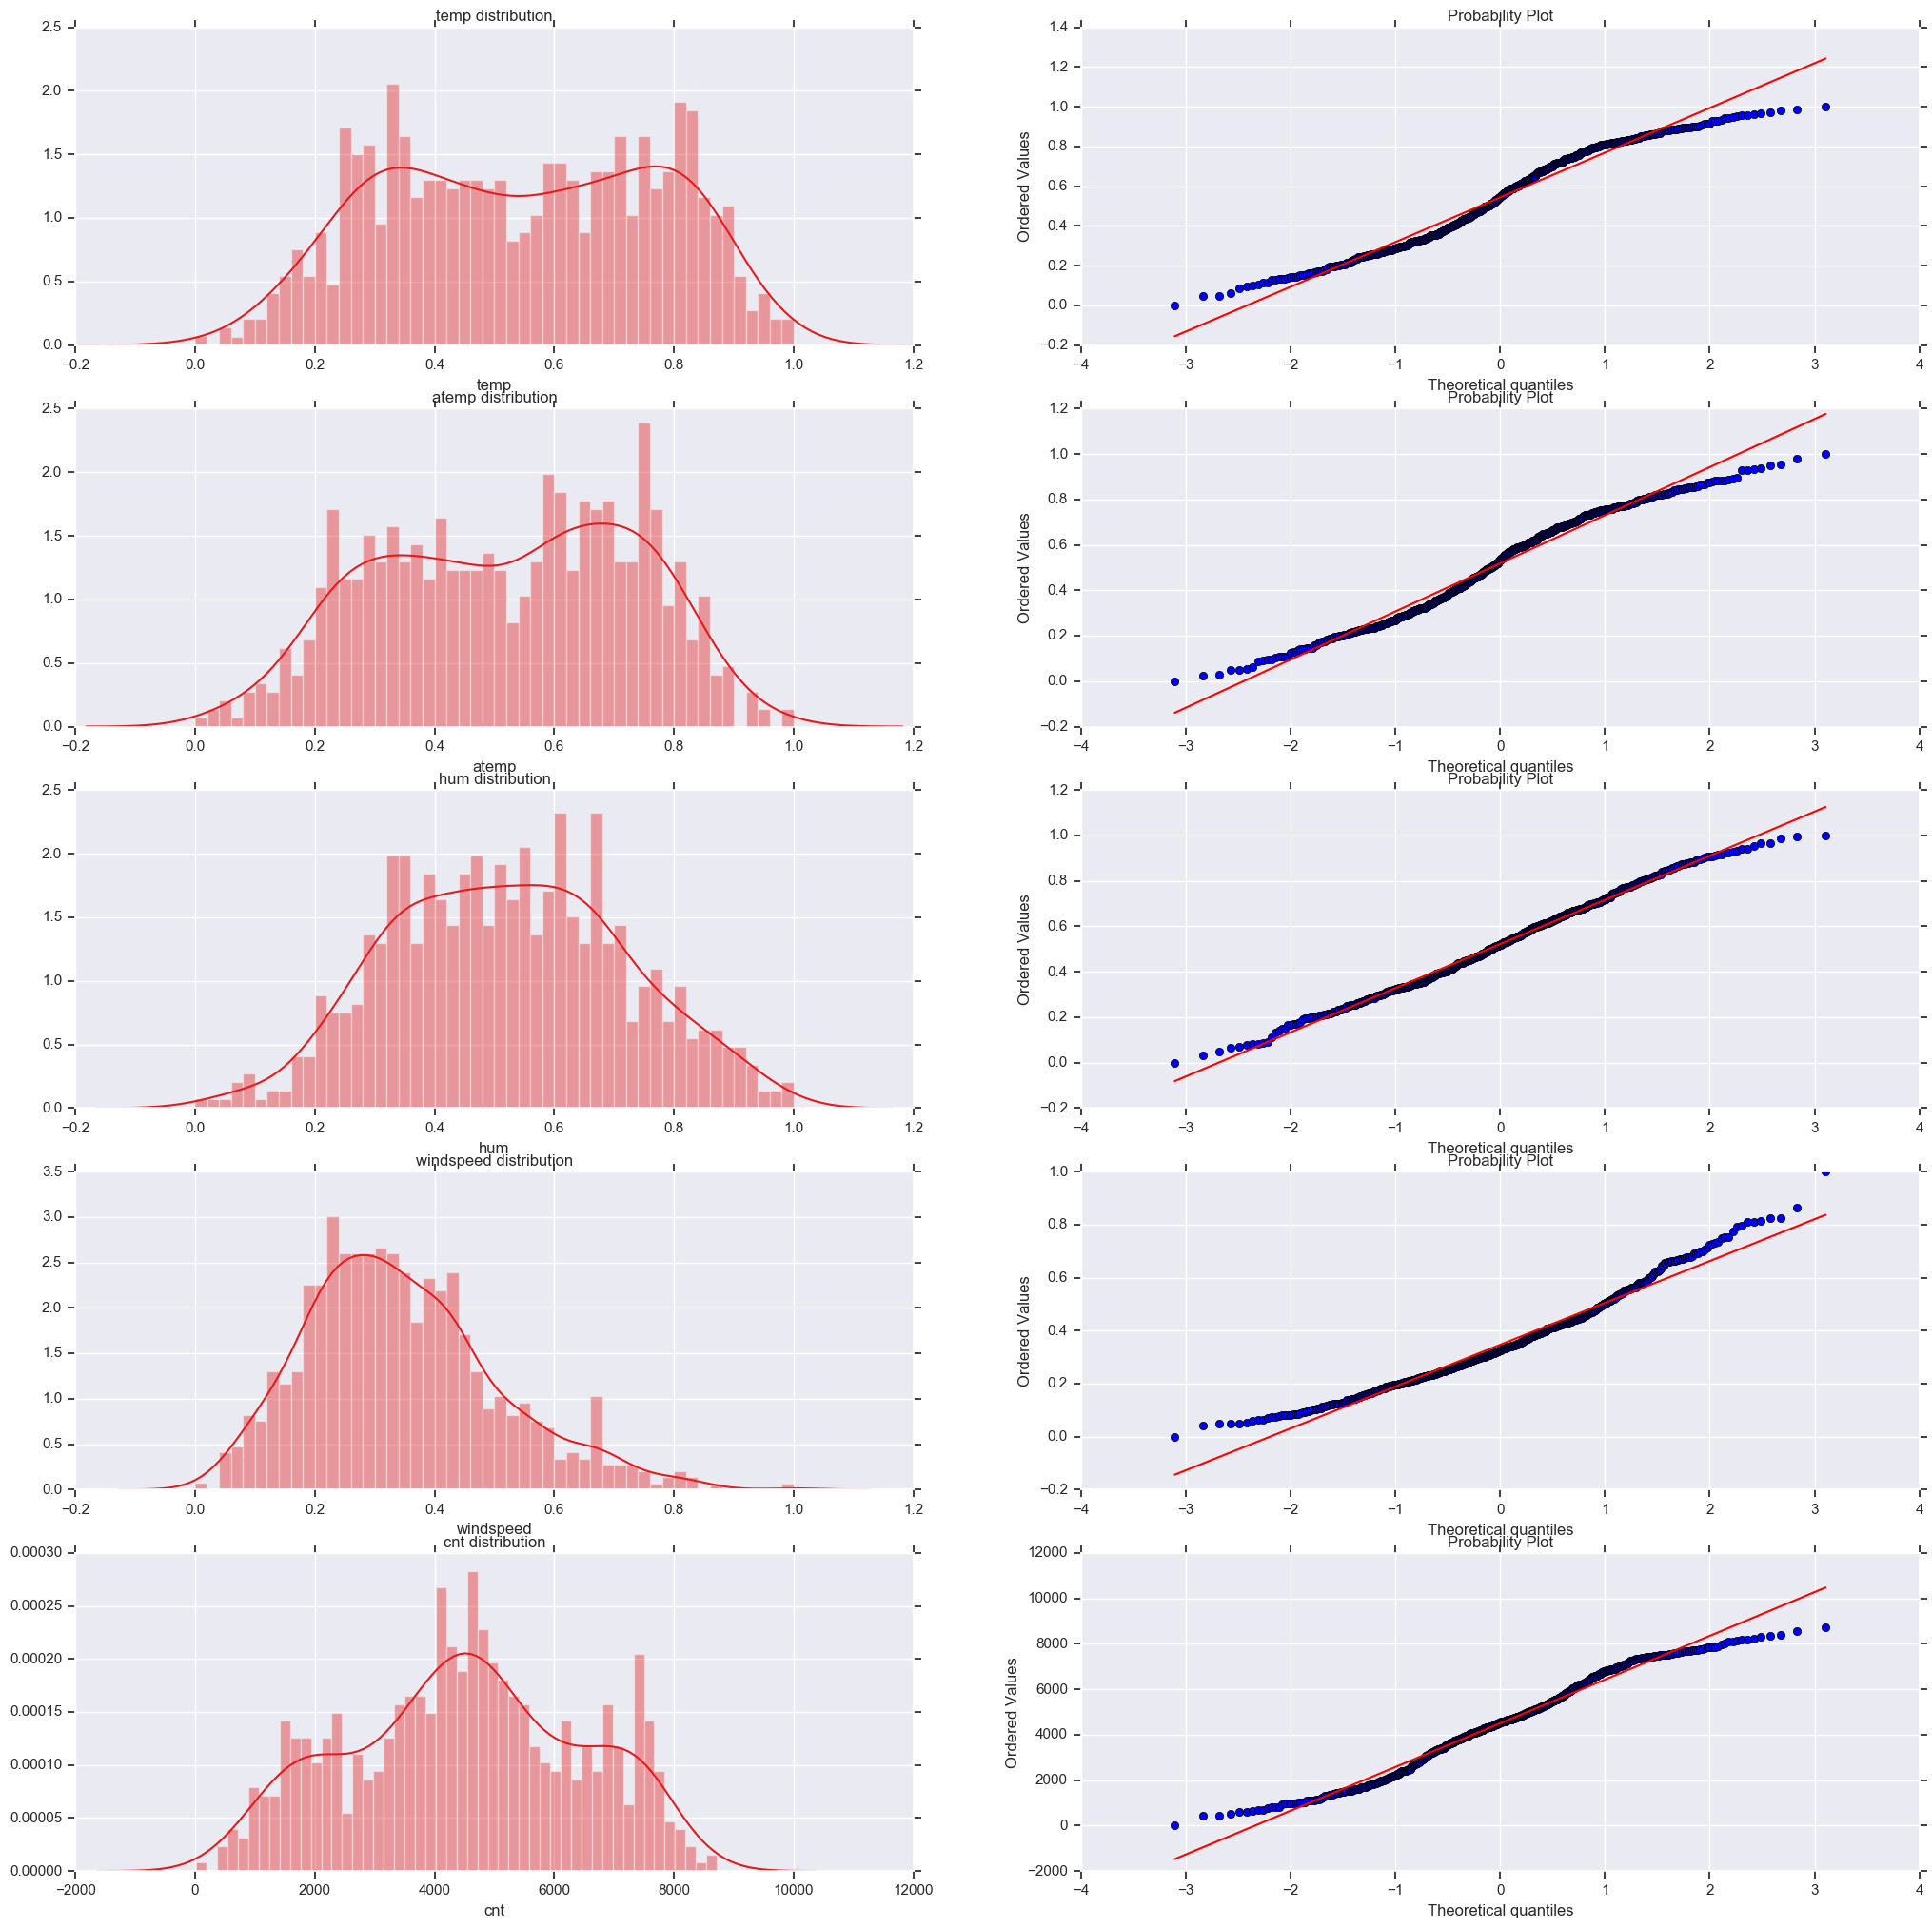

In [170]:
fig,ax = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(25, 25)
sns.distplot(df['temp'],bins =50,ax = ax[0][0])
ax[0][0].set(title="temp distribution")
_ = stats.probplot(df['temp'], dist='norm', fit=True,plot=ax[0][1])
ax[0][1].set(title="Probability Plot")
sns.distplot(df['atemp'],bins =50,ax = ax[1][0])
ax[1][0].set(title="atemp distribution")
_ = stats.probplot(df['atemp'], dist='norm', fit=True,plot=ax[1][1])
ax[1][1].set(title="Probability Plot")
sns.distplot(df['hum'],bins =50,ax = ax[2][0])
ax[2][0].set(title="hum distribution")
_ = stats.probplot(df['hum'], dist='norm', fit=True,plot=ax[2][1])
ax[2][1].set(title="Probability Plot")
sns.distplot(df['windspeed'],bins =50,ax = ax[3][0])
ax[3][0].set(title="windspeed distribution")
_ = stats.probplot(df['windspeed'], dist='norm', fit=True,plot=ax[3][1])
ax[3][1].set(title="Probability Plot")
sns.distplot(df['cnt'],bins =50,ax = ax[4][0])
ax[4][0].set(title="cnt distribution")
_ = stats.probplot(df['cnt'], dist='norm', fit=True,plot=ax[4][1])
ax[4][1].set(title="Probability Plot")
plt.show()

In [171]:
# Let us check variance for each column in dataset after Normalisation

In [172]:
df[num_var].var()

temp         0.052025
atemp        0.045757
hum          0.037749
windspeed    0.025525
dtype: float64

### Analysis of Variance(Anova) Test
It is carried out to compare between each groups in a categorical variable.

ANOVA only lets us know the means for different groups are same or not. It doesn’t help us identify which mean is different.

Hypothesis testing :

Null Hypothesis: mean of all categories in a variable are same.

Alternate Hypothesis: mean of at least one category in a variable is different.

If p-value is less than 0.05 then we reject the null hypothesis.

And if p-value is greater than 0.05 then we accept the null hypothesis.

In [173]:
df.head()

season yr holiday      temp     atemp       hum  windspeed  casual  \
dteday                                                                          
2011-01-01      1  0       0  0.355170  0.373517  0.767981   0.284606     331   
2011-01-02      1  0       0  0.379232  0.360541  0.615202   0.466215     131   
2011-01-03      1  0       0  0.171000  0.144830  0.254904   0.465740     120   
2011-01-04      1  0       0  0.175530  0.174649  0.468123   0.284297     108   
2011-01-05      1  0       0  0.209120  0.197158  0.254464   0.339143      82   

            registered   cnt  
dteday                        
2011-01-01         654   985  
2011-01-02         670   801  
2011-01-03        1229  1349  
2011-01-04        1454  1562  
2011-01-05        1518  1600

In [174]:
cat_var=['season','holiday','yr']
df[cat_var]=df[cat_var].apply(lambda x: x.astype('category') )
num_var=['temp','atemp','hum','windspeed','cnt']
df[num_var]=df[num_var].apply(lambda x: x.astype('float') ) 

In [175]:
def anova_test(df,target):
    for i in cat_var:
        formula=('{} ~ {}').format(target, i)
        df.lm = ols(formula,data=df).fit()
        table = sm.stats.anova_lm(df.lm, typ=1)
        print('Anova table between',target,'and',i,'is\n',table)

In [176]:
# print('\n For target var = casual--')
# anova_test(df,'casual')
# print('\n For target var = registered--')
# anova_test(df,'registered')
print('\n For target var = cnt--')
anova_test(df,'cnt')


 For target var = cnt--
Anova table between cnt and season is
              df        sum_sq       mean_sq           F        PR(>F)
season      3.0  9.505959e+08  3.168653e+08  128.769622  6.720391e-67
Residual  727.0  1.788940e+09  2.460715e+06         NaN           NaN
Anova table between cnt and holiday is
              df        sum_sq       mean_sq         F    PR(>F)
holiday     1.0  1.279749e+07  1.279749e+07  3.421441  0.064759
Residual  729.0  2.726738e+09  3.740381e+06       NaN       NaN
Anova table between cnt and yr is
              df        sum_sq       mean_sq           F        PR(>F)
yr          1.0  8.798289e+08  8.798289e+08  344.890586  2.483540e-63
Residual  729.0  1.859706e+09  2.551038e+06         NaN           NaN


In [177]:
#After looking at above table we see that p-value is greater than 0.05 for weekday and less for season,weathersit,yr.

#Therefore, we will accept the NULL hypothesis and we can say that some means are nearly/closely same for holiday.

# and accept alternate hypothsis for season,yr say that some means are not equal.

### Multicollinearity Test
VIF is always greater or equal to 1.

if VIF is 1 --- Not correlated to any of the variables.

if VIF is between 1-5 --- Moderately correlated.

if VIF is above 5 --- Highly correlated.

If there are multiple variables with VIF greater than 5, only remove the variable with the highest VIF.

In [178]:
df.dtypes

season        category
yr            category
holiday       category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt            float64
dtype: object

In [179]:
outcome, predictors = dmatrices('cnt ~ +season+ yr +holiday + temp+atemp + hum + windspeed',df, return_type='dataframe')


In [180]:
# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns 

In [181]:
vif

VIF      features
0  26.558808     Intercept
1   2.617748   season[T.2]
2   4.661588   season[T.3]
3   1.849396   season[T.4]
4   1.028536       yr[T.1]
5   1.003699  holiday[T.1]
6  70.364636          temp
7  66.340516         atemp
8   1.122843           hum
9   1.156377     windspeed

In [182]:
# From above Dataframe we see that there is Multicollinearity in our Data
# temp and atemp has highest VIF value

### Feature Engineering
Feature Engineering on numerical Features

we know that temp and atemp are both temperature values and are very highly correlated with each other.

we will aggregate those 2 columns and derive a new feature.

In [183]:
columns = ['temp','atemp']
df['mean_temp'] = df.apply(lambda row: row[columns].mean(), axis=1)

In [184]:
df.head()

season yr holiday      temp     atemp       hum  windspeed  casual  \
dteday                                                                          
2011-01-01      1  0       0  0.355170  0.373517  0.767981   0.284606     331   
2011-01-02      1  0       0  0.379232  0.360541  0.615202   0.466215     131   
2011-01-03      1  0       0  0.171000  0.144830  0.254904   0.465740     120   
2011-01-04      1  0       0  0.175530  0.174649  0.468123   0.284297     108   
2011-01-05      1  0       0  0.209120  0.197158  0.254464   0.339143      82   

            registered     cnt  mean_temp  
dteday                                     
2011-01-01         654   985.0   0.364343  
2011-01-02         670   801.0   0.369886  
2011-01-03        1229  1349.0   0.157915  
2011-01-04        1454  1562.0   0.175090  
2011-01-05        1518  1600.0   0.203139

In [185]:
# Now that we have derived a new Column 'mean_temp' we can drop 'temp' and 'atemp'
# Also we will drop 'casual' and 'registered' columns from our dataframe, as their addition is included in 'cnt' column.

In [186]:
df = df.drop(['temp','atemp'],axis=1)  

In [187]:
df.head()

season yr holiday       hum  windspeed  casual  registered     cnt  \
dteday                                                                          
2011-01-01      1  0       0  0.767981   0.284606     331         654   985.0   
2011-01-02      1  0       0  0.615202   0.466215     131         670   801.0   
2011-01-03      1  0       0  0.254904   0.465740     120        1229  1349.0   
2011-01-04      1  0       0  0.468123   0.284297     108        1454  1562.0   
2011-01-05      1  0       0  0.254464   0.339143      82        1518  1600.0   

            mean_temp  
dteday                 
2011-01-01   0.364343  
2011-01-02   0.369886  
2011-01-03   0.157915  
2011-01-04   0.175090  
2011-01-05   0.203139

#### Feature Engineering on Categorical Features


In [188]:
one_hot_var = ['season','holiday','yr']

In [189]:
#Creating dummies for categorical variables
for i in one_hot_var:
    ''' Creating dummies for each variable in one_hot_var and merging dummies dataframe to our original dataframe '''
    temp = pd.get_dummies(df[i], prefix = i)
    df = df.join(temp) 

In [190]:
df.columns

Index(['season', 'yr', 'holiday', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'mean_temp', 'season_1', 'season_2', 'season_3', 'season_4',
       'holiday_0', 'holiday_1', 'yr_0', 'yr_1'],
      dtype='object')

#### We will remove some variables which were used to generate one hot encoding variables

In [191]:
df = df.drop(['season','holiday','yr'],axis = 1)

#### Splitting data into train and test
With the time series data we will break up our train and test into continuous chunks.

The training data should be the earliest data and test data should be the latest data.

we will fit our model on the training data and test on the newest data, to understand how our model performs on new, unseen data.

we can't use sklearn's train_test_split bcoz it randomly shuffles the train and test data.

Separating features from target variable.

In [192]:
target_cnt = df.iloc[:,4]
target_casual = df.iloc[:,2]
target_registered = df.iloc[:,3]
target_cnt.head(),target_casual.head(),target_registered.head()

(dteday
 2011-01-01     985.0
 2011-01-02     801.0
 2011-01-03    1349.0
 2011-01-04    1562.0
 2011-01-05    1600.0
 Freq: D, Name: cnt, dtype: float64, dteday
 2011-01-01    331
 2011-01-02    131
 2011-01-03    120
 2011-01-04    108
 2011-01-05     82
 Freq: D, Name: casual, dtype: int64, dteday
 2011-01-01     654
 2011-01-02     670
 2011-01-03    1229
 2011-01-04    1454
 2011-01-05    1518
 Freq: D, Name: registered, dtype: int64)

In [193]:
feature = df.drop(['cnt','casual','registered'],axis=1)
feature.head()

hum  windspeed  mean_temp  season_1  season_2  season_3  \
dteday                                                                     
2011-01-01  0.767981   0.284606   0.364343       1.0       0.0       0.0   
2011-01-02  0.615202   0.466215   0.369886       1.0       0.0       0.0   
2011-01-03  0.254904   0.465740   0.157915       1.0       0.0       0.0   
2011-01-04  0.468123   0.284297   0.175090       1.0       0.0       0.0   
2011-01-05  0.254464   0.339143   0.203139       1.0       0.0       0.0   

            season_4  holiday_0  holiday_1  yr_0  yr_1  
dteday                                                  
2011-01-01       0.0        1.0        0.0   1.0   0.0  
2011-01-02       0.0        1.0        0.0   1.0   0.0  
2011-01-03       0.0        1.0        0.0   1.0   0.0  
2011-01-04       0.0        1.0        0.0   1.0   0.0  
2011-01-05       0.0        1.0        0.0   1.0   0.0

In [194]:
train_size = int(0.80 * df.shape[0]) # train_size = 584
train_features = feature[:train_size]
train_target_cnt = target_cnt[:train_size]
test_features = feature[train_size:]
test_target_cnt = target_cnt[train_size:]
print(df.shape, train_features.shape, test_features.shape,train_target_cnt.shape,test_target_cnt.shape) 

(731, 14) (584, 11) (147, 11) (584,) (147,)


In [195]:
df[train_size:].tail()

hum  windspeed  casual  registered     cnt  mean_temp  \
dteday                                                                   
2012-12-27  0.555105   0.675656     247        1867  2114.0   0.218367   
2012-12-28  0.467517   0.274350     644        2451  3095.0   0.236489   
2012-12-29  0.694316   0.210260     159        1182  1341.0   0.228190   
2012-12-30  0.319025   0.676936     364        1432  1796.0   0.222725   
2012-12-31  0.450116   0.273062     439        2290  2729.0   0.192413   

            season_1  season_2  season_3  season_4  holiday_0  holiday_1  \
dteday                                                                     
2012-12-27       1.0       0.0       0.0       0.0        1.0        0.0   
2012-12-28       1.0       0.0       0.0       0.0        1.0        0.0   
2012-12-29       1.0       0.0       0.0       0.0        1.0        0.0   
2012-12-30       1.0       0.0       0.0       0.0        1.0        0.0   
2012-12-31       1.0       0.0       0.0       0.0        1.0        0.0   

            yr_0  yr_1  
dteday                  
2012-12-27   0.0   1.0  
2012-12-28   0.0   1.0  
2012-12-29   0.0   1.0  
2012-12-30   0.0   1.0  
2012-12-31   0.0   1.0

In [196]:
pd.DataFrame(test_features).tail()

hum  windspeed  mean_temp  season_1  season_2  season_3  \
dteday                                                                     
2012-12-27  0.555105   0.675656   0.218367       1.0       0.0       0.0   
2012-12-28  0.467517   0.274350   0.236489       1.0       0.0       0.0   
2012-12-29  0.694316   0.210260   0.228190       1.0       0.0       0.0   
2012-12-30  0.319025   0.676936   0.222725       1.0       0.0       0.0   
2012-12-31  0.450116   0.273062   0.192413       1.0       0.0       0.0   

            season_4  holiday_0  holiday_1  yr_0  yr_1  
dteday                                                  
2012-12-27       0.0        1.0        0.0   0.0   1.0  
2012-12-28       0.0        1.0        0.0   0.0   1.0  
2012-12-29       0.0        1.0        0.0   0.0   1.0  
2012-12-30       0.0        1.0        0.0   0.0   1.0  
2012-12-31       0.0        1.0        0.0   0.0   1.0

#### Model Development

Regression metrics for our Models:

r square

MAE(Mean Absolute Error)

MSE(Mean square Error)

RMSE(Root Mean Square Error)

RMSLE( Root Mean Squared Log Error)

In [197]:
def rmsle(y,y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [198]:
def scores(y, y_):
    print('r square  ', metrics.r2_score(y, y_))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-train_features.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))
    print('MSE:', metrics.mean_squared_error(y, y_))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_))) 

In [203]:
def test_scores(model):
    print('---- Training Data Score ---')
    print()

In [ ]:
#Predicting result on Training data
     y_pred = model.predict(train_features)
    scores(train_target_cnt,y_pred)
    print('RMSLE:',rmsle(train_target_cnt,y_pred))
    print()
    print('------- Test Data Score --------')
    print()

In [ ]:
# Evaluating on Test Set
    y_pred = model.predict(test_features)
    scores(test_target_cnt,y_pred)
    print('RMSLE:',rmsle(test_target_cnt,y_pred))

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

### Linear Regression

In [204]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'copy_X':[True, False],
          'fit_intercept':[True,False]} 

In [205]:
# Instantiate a Decision reg classifier: reg
reg = LinearRegression()

In [ ]:
# Instantiate the gridSearchCV object: reg_cv
reg_cv = GridSearchCV(reg, param_dist, cv=5,scoring='r2')  

In [ ]:
# Fit it to the data
reg_cv.fit(feature, target_cnt)


In [ ]:
# Print the tuned parameters and score
print("Tuned Decision reg Parameters: {}".format(reg_cv.best_params_))
print("Best score is {}".format(reg_cv.best_score_))

#### Tuned Decision reg Parameters: {'copy_X': True, 'fit_intercept': True}
  Best score is 0.32346023751676756

In [ ]:
# Instantiate a reg regressor: reg
reg = LinearRegression(copy_X= True, fit_intercept=True)

# Fit the regressor to the data
reg.fit(train_features,train_target_cnt)

# Compute and print the coefficients
reg_coef = reg.coef_
print(reg_coef)

# Plot the coefficients
plt.plot(range(len(feature.columns)), reg_coef)
plt.xticks(range(len(feature.columns)), feature.columns.values, rotation=60)
plt.margins(0.02)
plt.savefig('linear coefficients')
plt.show()
test_scores(reg)

In [ ]:
from regressors import stats
stats.summary(reg,train_features,train_target_cnt)

In [ ]:
X = feature.values
splits = TimeSeriesSplit(n_splits=3)
plt.figure(figsize=(20,10))
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(310 + index)
    plt.xlim(0,731)
    plt.plot(pd.DataFrame(train).iloc[:,2])
    plt.plot(pd.DataFrame(test).iloc[:,2])
    index += 1
plt.show()

### Decision Tree Regression

In [ ]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeRegressor()

# Instantiate the gridSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(feature, target_cnt)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

##### Tuned Decision Tree Parameters: {'max_depth': 4, 'min_samples_split': 6}
Best score is -0.11405498284219874

[  7.55430892e-02   1.70896760e-02   5.71162990e-01   6.17715039e-03
   6.76476928e-04   1.91703179e-04   5.40410675e-02   0.00000000e+00
   0.00000000e+00   0.00000000e+00   2.75117847e-01]


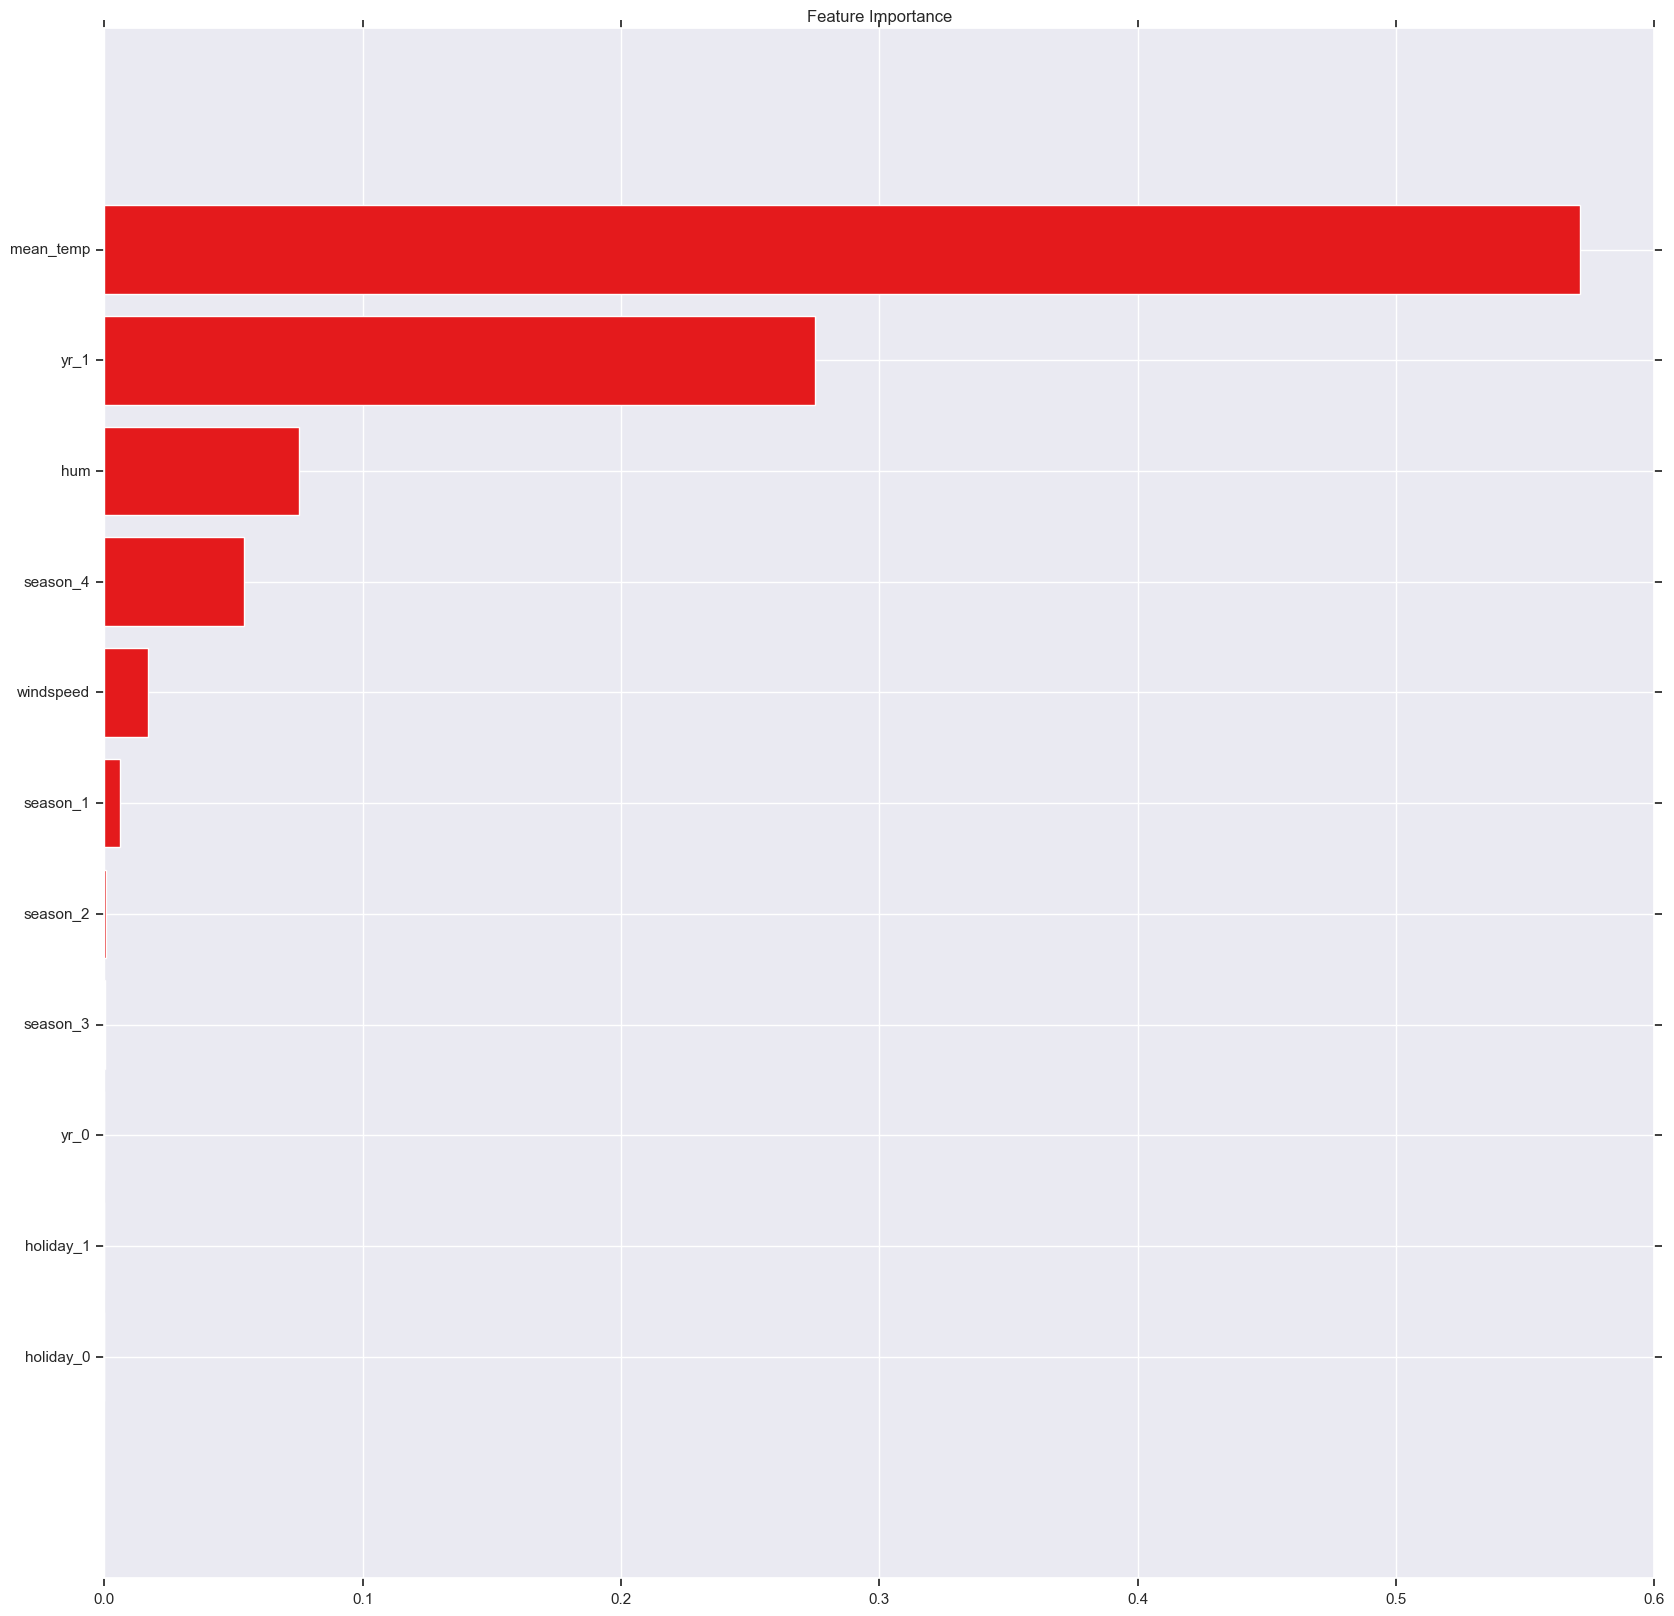

---- Training Data Score ---



In [210]:
# Instantiate a tree regressor: tree
tree = DecisionTreeRegressor(max_depth= 6, min_samples_split=4)

# Fit the regressor to the data
tree.fit(train_features,train_target_cnt)

# Compute and print the coefficients
tree_features = tree.feature_importances_
print(tree_features)

# Sort feature importances in descending order
indices = np.argsort(tree_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [feature.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,20))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(train_features).shape[1]),tree_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(train_features).shape[1]), names)
# plt.savefig('tree feature importance')
plt.show()
# Make predictions and cal error
test_scores(tree)

### Random Forest Regression

In [ ]:
# Create the random grid
random_grid = {'n_estimators': range(100,700,100),
               'max_depth': range(10,20,1),
               'min_samples_split':range(2,5,1)}
# Instantiate a Decision Forest classifier: Forest
Forest = RandomForestRegressor()

# Instantiate the gridSearchCV object: Forest_cv
Forest_cv = GridSearchCV(Forest, random_grid, cv=5)

# Fit it to the data
Forest_cv.fit(feature, target_cnt)

# Print the tuned parameters and score
print("Tuned Decision Forest Parameters: {}".format(Forest_cv.best_params_))
print("Best score is {}".format(Forest_cv.best_score_))

In [ ]:
# Instantiate a Forest regressor: Forest
Forest = RandomForestRegressor(max_depth= 15, min_samples_split=2,n_estimators=100)

# Fit the regressor to the data
Forest.fit(train_features,train_target_cnt)

# Compute and print the coefficients
Forest_features = Forest.feature_importances_
print(Forest_features)

# Sort feature importances in descending order
indices = np.argsort(Forest_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [feature.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,20))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(train_features).shape[1]),Forest_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(train_features).shape[1]), names)
# plt.savefig('Random forest feature importance')
plt.show()# Make predictions
test_scores(Forest)

### We have selected Random Forest Regression as our Best Model to Predict Bike Rental Count.
Lets compare the distribution of train and test results. More or less the distribution of train and test looks identical.
It confirms visually that our model has not predicted really bad and not suffering from major overfitting problem.

In [ ]:
pd.DataFrame(test_predicted,index = test_target_cnt.index,columns=['cnt']).head()

#### Original Bike Rental Count :-

In [222]:
pd.DataFrame(test_target_cnt,columns=['cnt']).head()

cnt
dteday            
2012-08-07  7273.0
2012-08-08  7534.0
2012-08-09  7286.0
2012-08-10  5786.0
2012-08-11  6299.0

In [ ]:
##########################finally we pridicted the bike count in enviromental basis.########################################